# Part I  - Exploration and Analysis of Loan Data from Prosper

### by F Njakai



## Table of Contents

* [Introduction](#intro)
* [Preliminary Wrangling](#prel-wrangling)
* [Univariate Exploration](#univar)
* [Bivariate Exploration](#bivar)
* [Multivariate Exploration](#multivar)
* [Summary of Findings](#summary)
* [Conclusions](#outro)

<div id="intro"></div>

## Introduction

[Prosper](https://www.prosper.com/) is a peer-to-peer lending marketplace. At the time of writing, Prosper operates in the US and has issued loans worth over USD 22 billion to _c._ 1.4 million borrowers. Borrowers apply online for a fixed-rate, fixed-term loan between USD 2,000.00 and USD 40,000.00. Individuals, like you and I, and institutions, Sequoia Capital for example, invest in said loans. Prosper handles all loan servicing on behalf of the borrowers and investors.

The data set at hand has 113,937 observations (loans, if you like) and 81 variables; detailed information on the variables can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). Observations relate to the years 2005 to 2014, inclusive.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.

<div id="prel-wrangling"></div>



## Preliminary Wrangling

upgrade pandas

In [19]:
#upgrade `pandas`
!pip install --upgrade pandas

  Using cached https://files.pythonhosted.org/packages/c3/e2/00cacecafbab071c787019f00ad84ca3185952f6bb9bca9550ed83870d4d/pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 13.4MB 2.2MB/s eta 0:00:01  9% |███                             | 1.2MB 27.1MB/s eta 0:00:01    43% |█████████████▉                  | 5.8MB 19.8MB/s eta 0:00:01    51% |████████████████▌               | 6.9MB 22.1MB/s eta 0:00:01    60% |███████████████████▍            | 8.1MB 23.5MB/s eta 0:00:01    76% |████████████████████████▋       | 10.3MB 21.9MB/s eta 0:00:01    92% |█████████████████████████████▌  | 12.4MB 23.0MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 16.8MB/s ta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: python-dateutil 2.6.1
    Uninstalling p

In [1]:
#import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
from random import randint
from os import path

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

%matplotlib inline

#### Default settings for plots

Automate, as much as possible, the process of creating visualisations

Why?
* it is efficient
* visualisations are consistent

How?
* create templates


In [2]:
#template no. 1

#default blue
default_blue = sns.color_palette('tab10')[0]

#default orange, if required
default_orange = sns.color_palette('tab10')[1]


#default pallete
default_pallete = sns.color_palette('tab10')

In [3]:
#template no. 2

'''
simple function to create `Figure` object
using matplotlib that contains an x-lab,
y-lab and title.

"Father Figure", if you like :)

3 params, all type `str`:
x_lab, y_lab and title

Please make sure all args passed to the 
function are type `str`

return: None
'''
def create_fig(x_lab: str, y_lab: str, title: str):
    """create_fig function"""
    try:
        #fig size
        plt.figure(figsize=(10, 6.18), dpi=216, frameon=False, clear=True)
        #x-axis name
        plt.xlabel(x_lab)
        #y-axis name 
        plt.ylabel(y_lab)
        #title
        plt.title(title)
    except ModuleNotFoundError:
        print(f'Please `import matplotlib.pyplot as plt` and try again')
    except:
        print(f'Failed to create template')
        raise


In [4]:
#template no. 3

'''
simple function to create `Figure` object
using matplotlib for sub-plots.

"Father Figure" for subplots :)

2 params, type int; the number of sub-plots.
@n_row -> #rows
@n_col -> #cols

return: fig and ax objects
'''
def create_sub(n_row: int=1, n_col: int=1):
    """create_sub function"""
    try:
        #fig, ax and figsize
        fig, ax = plt.subplots(n_row, n_col, figsize=(10,6.18), dpi=216)
        fig.tight_layout(pad=10.0)
        return fig, ax
    except ModuleNotFoundError:
        print(f'Please `import matplotlib.pyplot as plt` and try again')
    except:
        print(f'Failed to create template')
        raise


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [5]:
#see if a df exists

'''
a simple function to see if a df exists

takes in 1 param: name of the df

Please do not pass the arg as a string

return: None
'''

def confirm_df_exists(df):
    """ function confirm_exists """
    if not df.empty:
        print(f'This dataframe exists')
        return
    print(f'This dataframe does not exist')
    



In [6]:
#group data and find mean

'''
Function to calculate mean of
grouped data

Takes in 2 args: var_1 and var_2

Both args must be columns of a pandas DF

return: average  of grouped data
'''

def group_avg(var_1, var_2):
    """ function group_avg"""
    if var_1 and var_2:
        avg_gp_data = df.groupby(var_1)[var_2].mean()
        return avg_gp_data
    else:
        print(f'Check that both arguments are columns of a pandas DF and try again')

In [7]:
#group data and find sum

'''
Function to calculate sum of
grouped data

Takes in 2 args: var_1 and var_2

Both args must be columns of a pandas DF

return: sum  of grouped data
'''

def group_sum(var_1, var_2):
    """ function group_sum"""
    if var_1 and var_2:
        sum_gp_data = df.groupby(var_1)[var_2].sum()
        return sum_gp_data
    else:
        print(f'Check that both arguments are columns of s pandas DF and try again')

In [8]:
'''
function to create and sort a DF

3 params:
@x: pandas series #1
@y: pandas series #2
@ascending: bool, default T

return: pandas DF
'''
def custom_sort_df(x, y, ascending:bool=True):
    """function custom_sort_df"""
    try:
        dd = pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()
        dd.sort_values('Count', inplace=True, ascending=ascending)
        dd.reset_index(inplace=True)
        return dd
    except:
        print(f'Check that x and y are pandas series and try again')
        raise

In [9]:
'''
function to confirm that a file has been created
and/or exists in the current dir

one param: type `str`:
@file_name -> name of the file (include extension, please)

return: none
'''

def confirm_file_exists(file_name: str):
    """function confirm_file_exists"""
    if path.exists(file_name):
        print(f'File exists')
    else:
        print(f'Something went wrong. Investigate')

#### Load and inspect the data set

In [11]:
#load the data set
df = pd.read_csv('prosperLoanData.csv', sep=',')
confirm_df_exists(df)

This dataframe exists


In [15]:
df.shape

(113937, 81)

In [16]:
df.duplicated().value_counts()

False    113937
dtype: int64

In [17]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [18]:
df.sample(randint(5, 15))

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
106036,D41B3366294853884A3A89C,2796,2006-03-21 13:18:53.110000000,AA,36,Completed,2007-05-09 00:00:00,0.08584,0.0790,0.0740,...,-14.07,0.00,0.00,0.00,0.00,1.0,0,0,0.0,44
77212,18AD339102880364988E6E3,143834,2007-05-28 21:33:30.417000000,AA,36,Completed,2009-04-24 00:00:00,0.08684,0.0800,0.0750,...,-32.15,0.00,0.00,0.00,0.00,1.0,0,0,0.0,132
62636,DDB63426097521851603462,362582,2008-07-06 05:22:35.263000000,A,36,Completed,2010-12-02 00:00:00,0.10033,0.0865,0.0765,...,-99.22,0.00,0.00,0.00,0.00,1.0,0,0,0.0,221
74360,59643430764563411B3EC45,392405,2008-09-03 13:22:58.180000000,A,36,Completed,2011-09-12 00:00:00,0.10336,0.0895,0.0795,...,-96.39,0.00,0.00,0.00,0.00,1.0,0,0,0.0,248
103085,959A3471861802972ADDCAF,440621,2010-01-02 05:31:19.537000000,NaN,36,Defaulted,2010-08-15 00:00:00,0.36742,0.3430,0.3330,...,-5.18,0.00,2938.57,2938.57,0.00,1.0,0,0,0.0,109
68869,341F355831215718458FE3B,639586,2012-09-13 15:49:42.213000000,NaN,36,Current,NaN,0.31012,0.2710,0.2610,...,-47.41,0.00,0.00,0.00,0.00,1.0,0,0,0.0,42
36629,4E4E35169427580923B098A,509704,2011-06-04 07:24:03.963000000,NaN,36,Completed,2012-07-24 00:00:00,0.27467,0.2399,0.2299,...,-20.55,0.00,0.00,0.00,0.00,1.0,0,0,0.0,38
40847,B5B433679368451001A76B1,40931,2006-09-20 20:54:14.143000000,A,36,Completed,2009-09-25 00:00:00,0.10190,0.0950,0.0900,...,-24.08,0.00,0.00,0.00,0.00,1.0,0,0,0.0,17
50850,423F360036668300091C50F,1136612,2014-01-15 17:07:26.827000000,NaN,36,Current,NaN,0.14206,0.1139,0.1039,...,-4.25,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
99514,ED083395499578642F81DF1,171379,2007-07-17 20:28:42.807000000,D,36,Chargedoff,2009-12-01 00:00:00,0.20684,0.1995,0.1895,...,-67.32,-126.43,2339.44,903.96,280.52,1.0,0,0,0.0,128


### Structure

#### Overall

* 113,937 observations
* 81 variables
    * 3 of type `bool`
    * 50 of type `float`
    * 11 of type `int`
    * 17 of type `str`
* variable `LoanOriginationDate` is of type `str`
* variables `Occupation` and `IncomeRange` are of type `str`

#### Missing and null values

* some observations in `df` have missing or null values
    * case(s) in point
        * 100,596 under variable `GroupKey`
        * 96,985 under variable `LoanFirstDefaultedCycleNumber`
    * will decide which ones to fill and/or drop on a case-by-case basis
        * Why?
            * some variables are [qualitative](https://www.statology.org/qualitative-vs-quantitative-variables/)
            * some variables apply to an observation conditionally
                * example: `GroupKey` represents observations that fall under a criteria; the number of said groups cannot  be reasonably expected to be 113,937
                

#### Duplicated observations

* `df` has no duplicated observations

#### Multiple values for a variable

* observations in `df` have 1 value per variable 



### Feature(s) of interest in dataset

> Your answer here!

### Feature(s) in the dataset that may help support investigation into feature(s) of interest

> Your answer here!


### Clean the data set

* will perform a chap-chap cleaning process viz:
    * drop variables whose missing values are above a threshold (in this case, 15%)
    * drop observations whose missing values are above a threshold (in this case, 10%)
    * change the type of  variable `LoanOriginationDate` to `datetime`
    * change the type of variables `Occupation` and `IncomeRange` to `category`

In [12]:
#create a copy of the df
df = df.copy()

In [20]:
#drop variables whose missing values are above the threshold
df.drop(columns=df.columns[df.eq(0).mean()>0.85], inplace=True)
df.shape

(113937, 72)

In [15]:
#drop observations whose missing values are above the threshold
df.drop(index=df.index[df.eq(0).mean()>0.9], inplace=True)
df.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/indexes/base.py:2095: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 113931 but corresponding boolean dimension is 81
  result = getitem(key)


(113925, 81)

In [22]:
#save cleaned data set as a `.csv` file then load it under the variable `df`

#save data set as a `.csv`
df.to_csv('prosper_loans_data.csv', index=False, encoding='utf-8', sep=',')

#confirm that the`.csv` file exists
confirm_file_exists('prosper_loans_data.csv')

File exists


In [10]:
#load the clean df
df = pd.read_csv('prosper_loans_data.csv', sep=',')
confirm_df_exists(df)

This dataframe exists


In [11]:
#change the type of variable `LoanOriginationDate` to `datetime`
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)
df.LoanOriginationDate.sample(randint(3, 5))

14859   2012-11-23
22104   2013-10-18
84167   2012-10-30
Name: LoanOriginationDate, dtype: datetime64[ns]

In [12]:
#change the type of variables `Occupation` and `IncomeRange` to `category`
df.Occupation = df.Occupation.astype("category")
df.IncomeRange = df.IncomeRange.astype("category")

In [13]:
#handling categorical variables for ease of plotting
df_0 = {'LoanStatus' : ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
                      'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)',
                      'Defaulted', 'ChargedOff', 'Cancelled'],
     'IncomeRange' : ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed',
                       'Not employed'],
     'ProsperRating (Alpha)' : ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
     'IsBorrowerHomeowner' : [True, False],
     'IncomeVerifiable' : [False, True]
       }


for i in df_0:
    ordered_df = pd.api.types.CategoricalDtype(ordered= True, categories= df_0[i])
    df[i] = df[i].astype(ordered_df)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 72 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             101945 non-null category
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha

#### Generate a pre-EDA report using `sweetviz`

In [20]:
# pre_eda_rpt = sv.analyze(df)
# pre_eda_rpt.show_html('./Summary_EDA_Report.html')

##does not work :(

<div id="univar"></div>

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Method <div id="method"></div>

   * ask a question
      * state what will be done to answer the question
   * code
      * do what was stated
   * visualise
   * state the findings


### Question #1

#### What is the average amount borrowed?

* QED; find the mean of `LoanOriginalAmount`
* will look at the quartiles and std dev too

In [28]:
pd.DataFrame(df.LoanOriginalAmount.describe())

,LoanOriginalAmount
count,113937.00000
mean,8337.01385
std,6245.80058
min,1000.00000
25%,4000.00000
50%,6500.00000
75%,12000.00000
max,35000.00000


#### Findings

* average amount borrowed is _c._ USD 8,337.00
* loans of amount USD 5k, 10k, 15k, 20k and 25k have higher-than-average frequency
* the range is USD 1,000.00 to 35,000.00
    * [Prosper's website](https://www.prosper.com/about) says USD 2,000.00 to 40,000.00
    * this could be, among others:
        * `Prosper` could have revised its loan policy
        * `Prosper` could have increased its product offering
* the CV is _c._ 0.75 (6245.80058/8337.01385); this suggests that majority of the observations are close to the mean
    * majority of the amounts are in the range USD 1,000.00 to 15,000.00
* the mean is greater than the median (50%); this suggests a skew to the right


a histogram of the above...

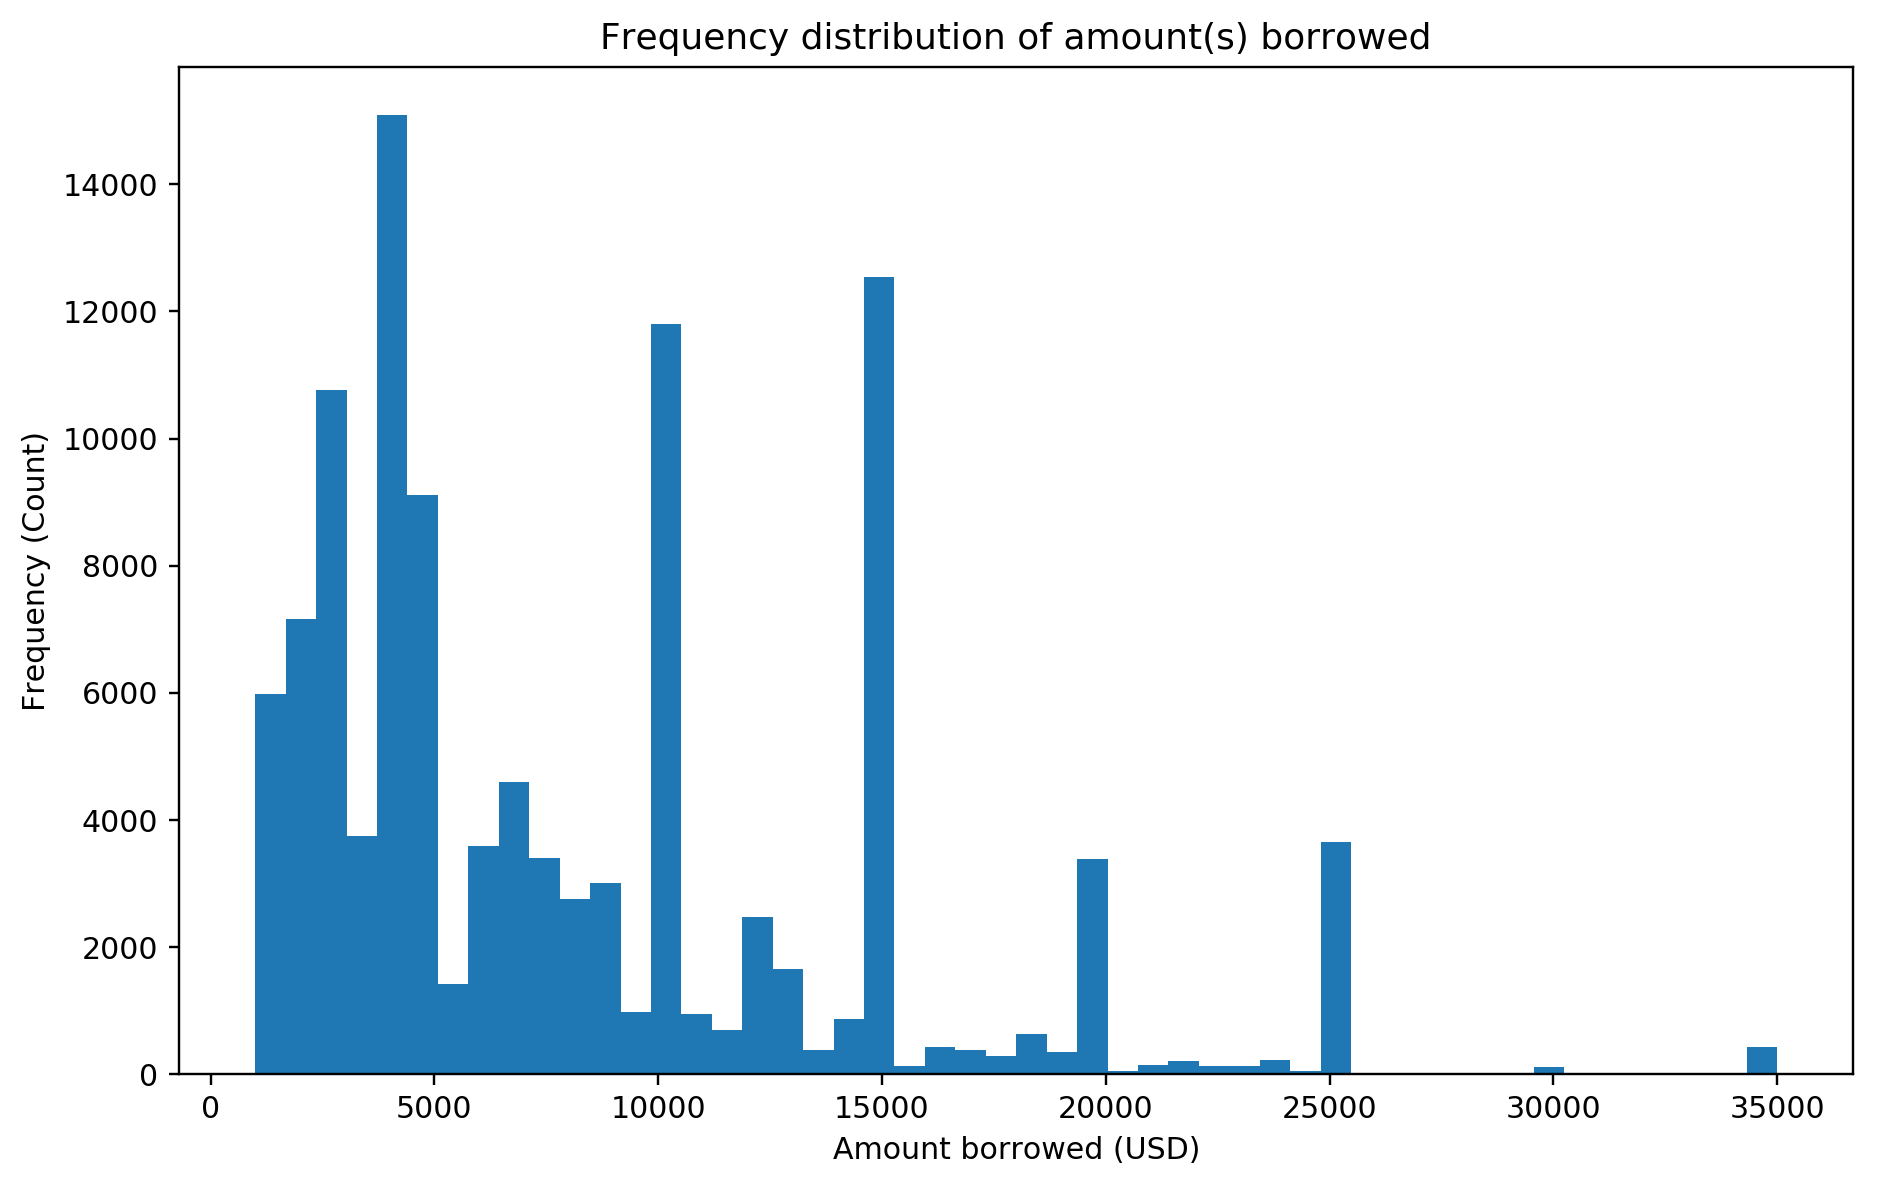

In [29]:
#create a hist
create_fig('Amount borrowed (USD)','Frequency (Count)','Frequency distribution of amount(s) borrowed')
plt.hist(df.LoanOriginalAmount, bins=50, color=default_blue);

### Question #2

#### What is the average rate of borrowing?

* find the mean of `BorrowerRate`
* look at quartile and std dev too

In [30]:
pd.DataFrame(df.BorrowerRate.describe())

,BorrowerRate
count,113937.000000
mean,0.192764
std,0.074818
min,0.000000
25%,0.134000
50%,0.184000
75%,0.250000
max,0.497500


#### Findings

* average rate is _c._ 0.19%
* the range is zero to 0.5%
    * does `Prosper` offer interest-free loans?
    * if yes:
        * who do they lend to at that rate?
        * why?
        * what are the pre-requisites and terms?
* the CV is _c._ 0.39 (0.074818/0.192764); this suggests that observations are more or less evenly distributed around the mean
    * there are, however, rates that have higher-than-average frequency at the range 0.08% to 0.35%
* the mean is slightly greater than the median (50%); this suggests a slight skew to the right


a histogram of the above supports the findings...

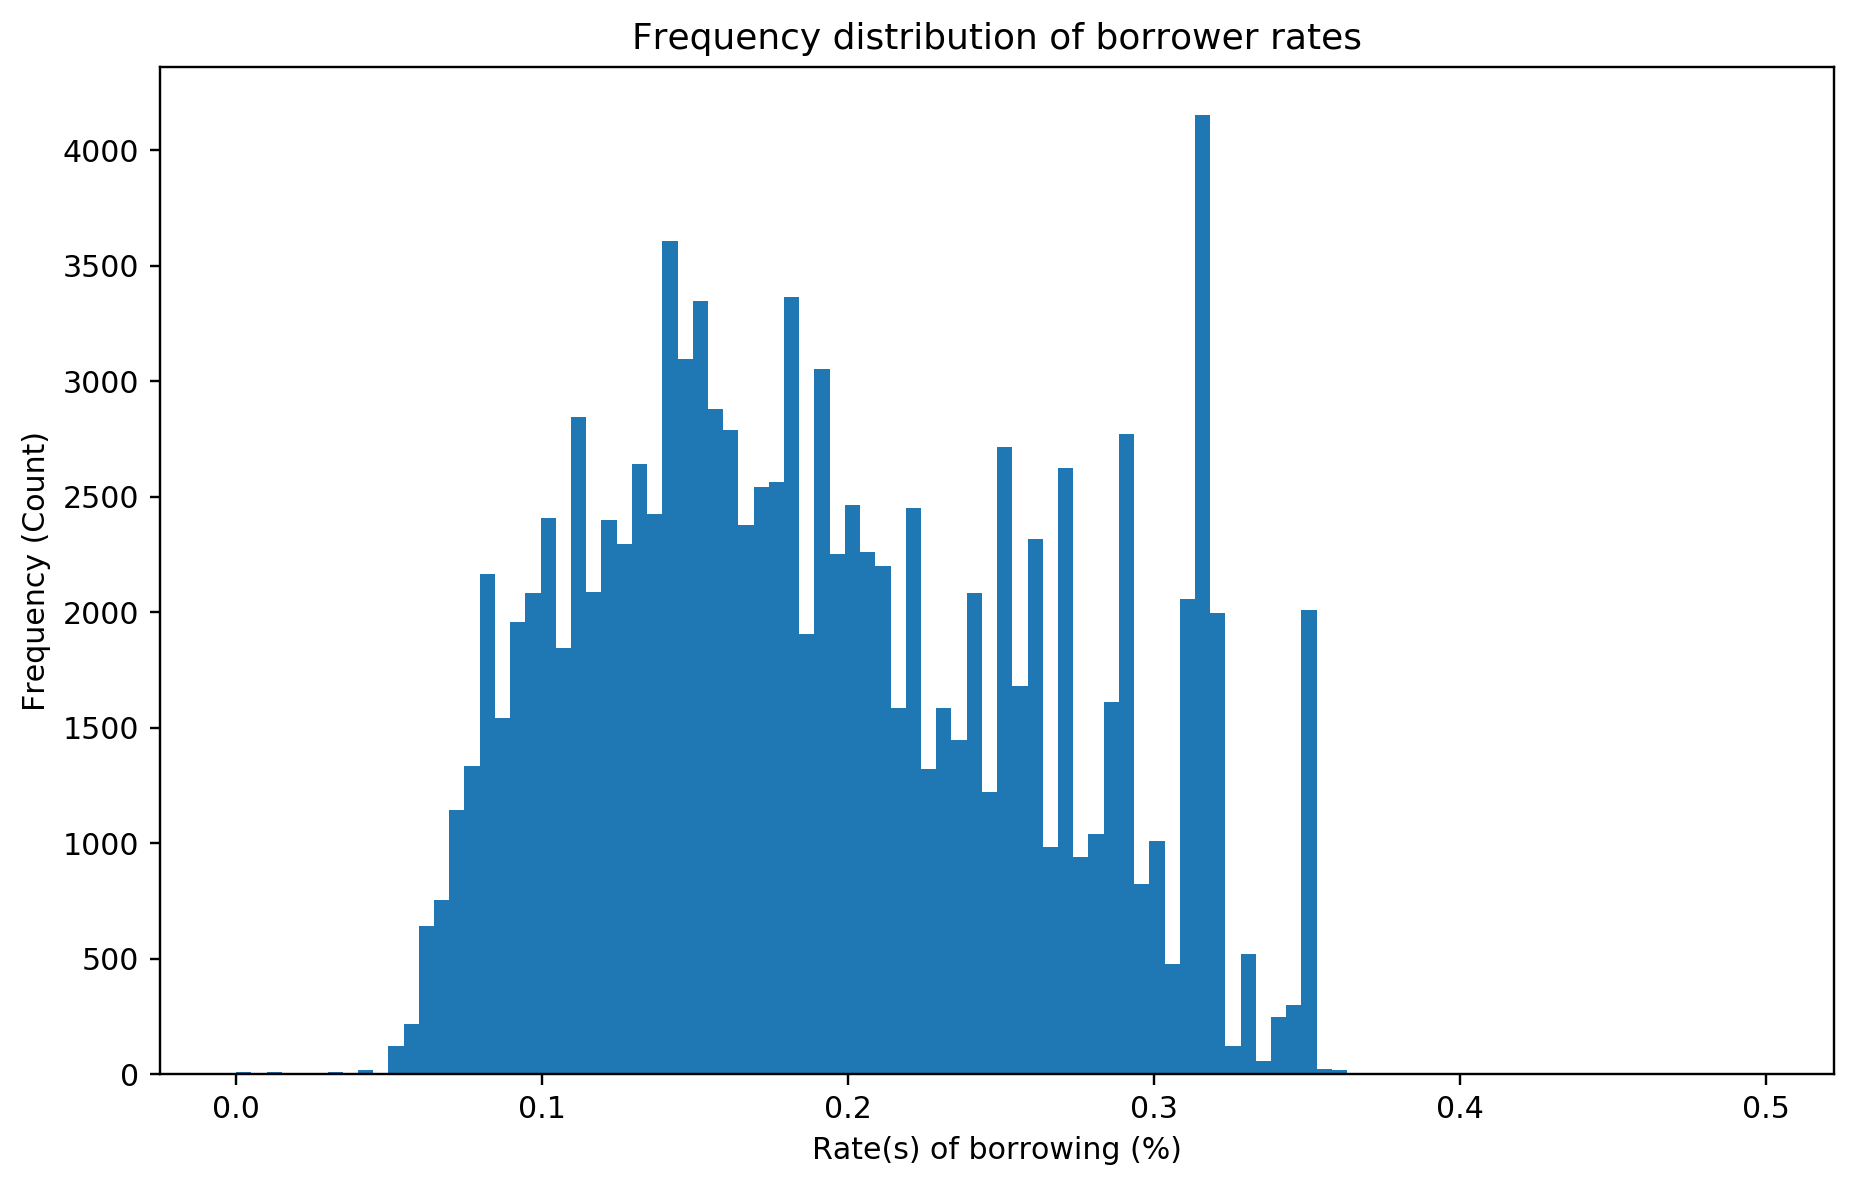

In [31]:
#create hist
create_fig('Rate(s) of borrowing (%)', 'Frequency (Count)', 'Frequency distribution of borrower rates')
plt.hist(df.BorrowerRate, bins=100, color=default_blue);

### Question #3

#### How does the number of loans issued behave over the years?

* does it change at all?
    * if yes, what is the direction of change?
* plot the number of loans issued against `LoanOriginationDate `

In [29]:
#sum of loans by year
sum_loan_time = group_sum('LoanOriginationDate','LoanNumber')

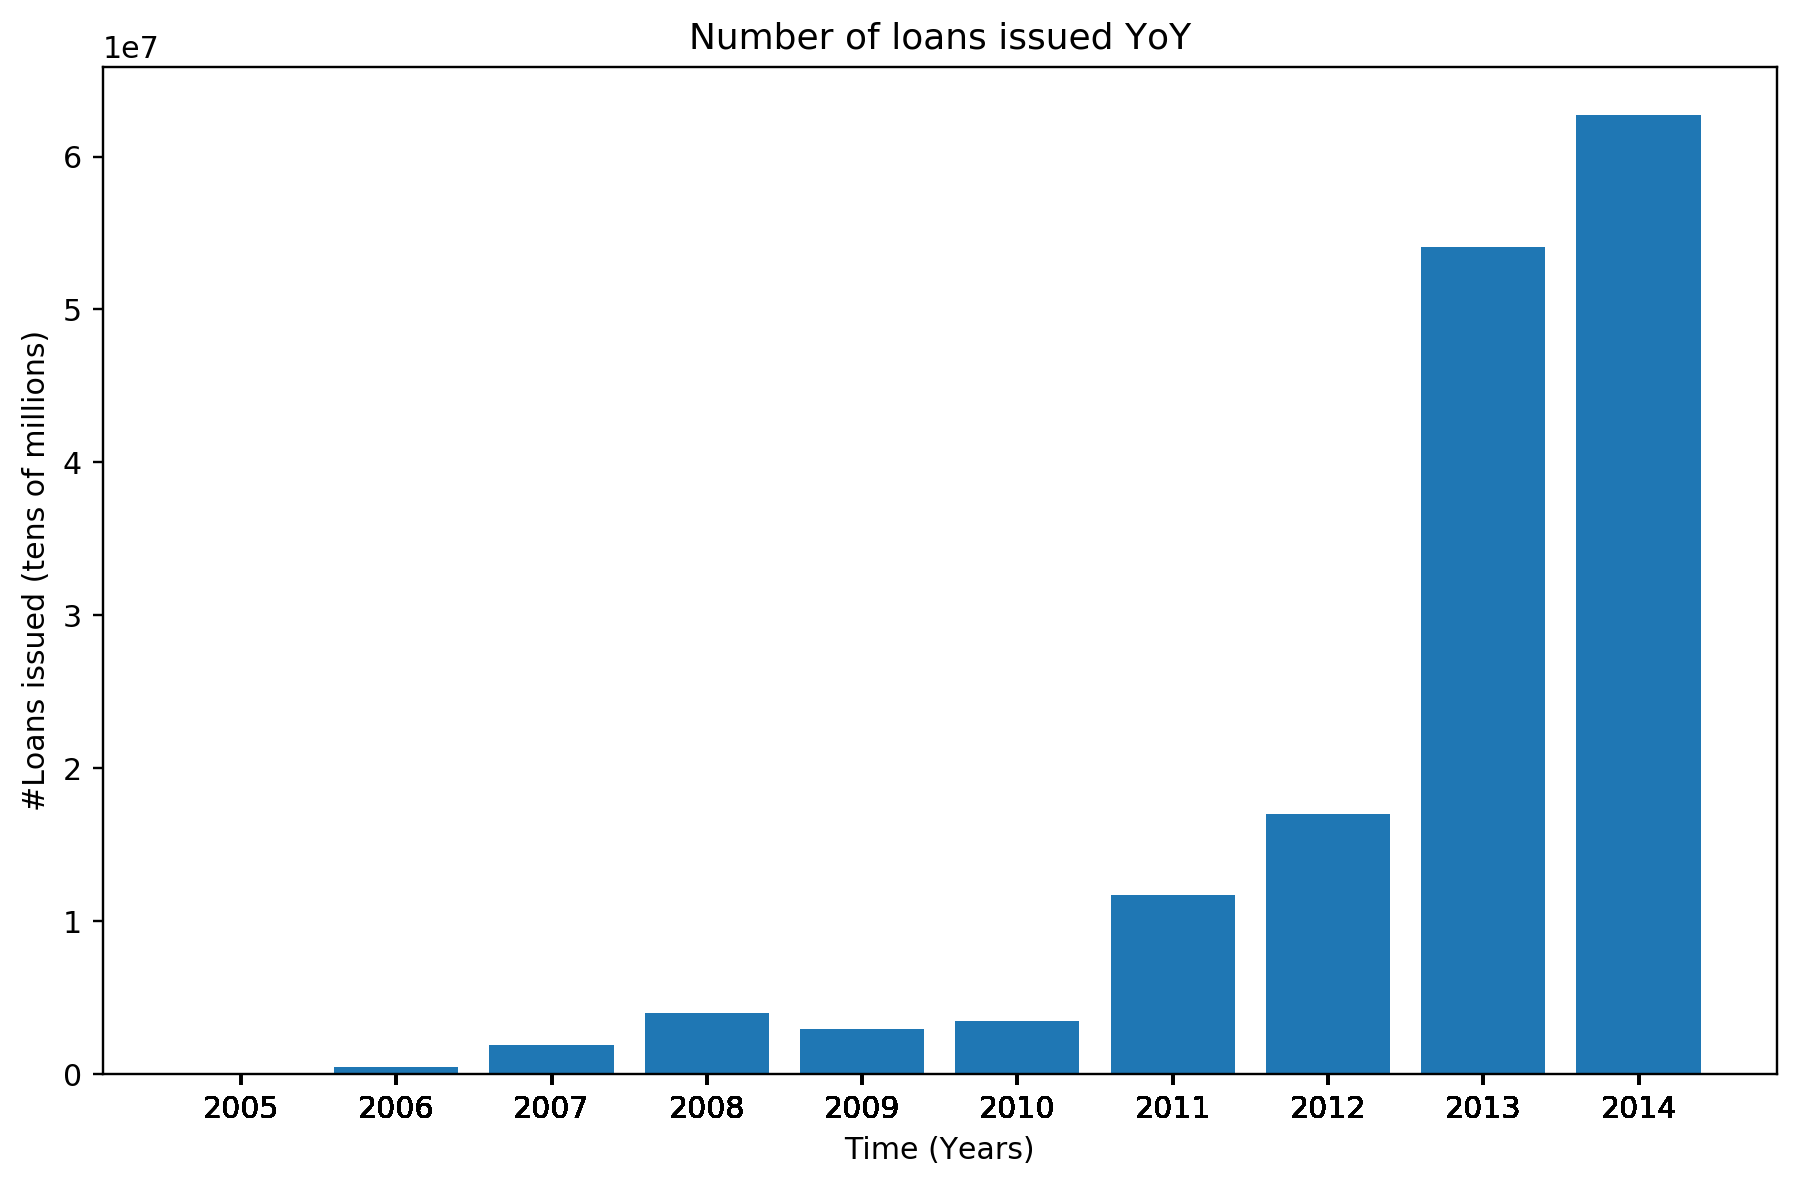

In [30]:
#number of loans issued
y = [sum_loan_time.values[i] for i in range(len(sum_loan_time))]

#time (years)
x = [sum_loan_time.index[i].year for i in range(len(sum_loan_time))]

#create plot
create_fig('Time (Years)', '#Loans issued (tens of millions)', 'Number of loans issued YoY')
plt.bar(x, y, tick_label=x, color=default_blue)
plt.yticks(np.arange(0, 65000000, step=10000000));

In [34]:
#view basic descriptive stats of `sum_loan_time`
pd.DataFrame(sum_loan_time).describe()

,LoanNumber
count,1.873000e+03
mean,4.224397e+06
std,7.469088e+06
min,1.000000e+00
25%,6.210580e+05
50%,1.297575e+06
75%,4.252496e+06
max,6.274263e+07


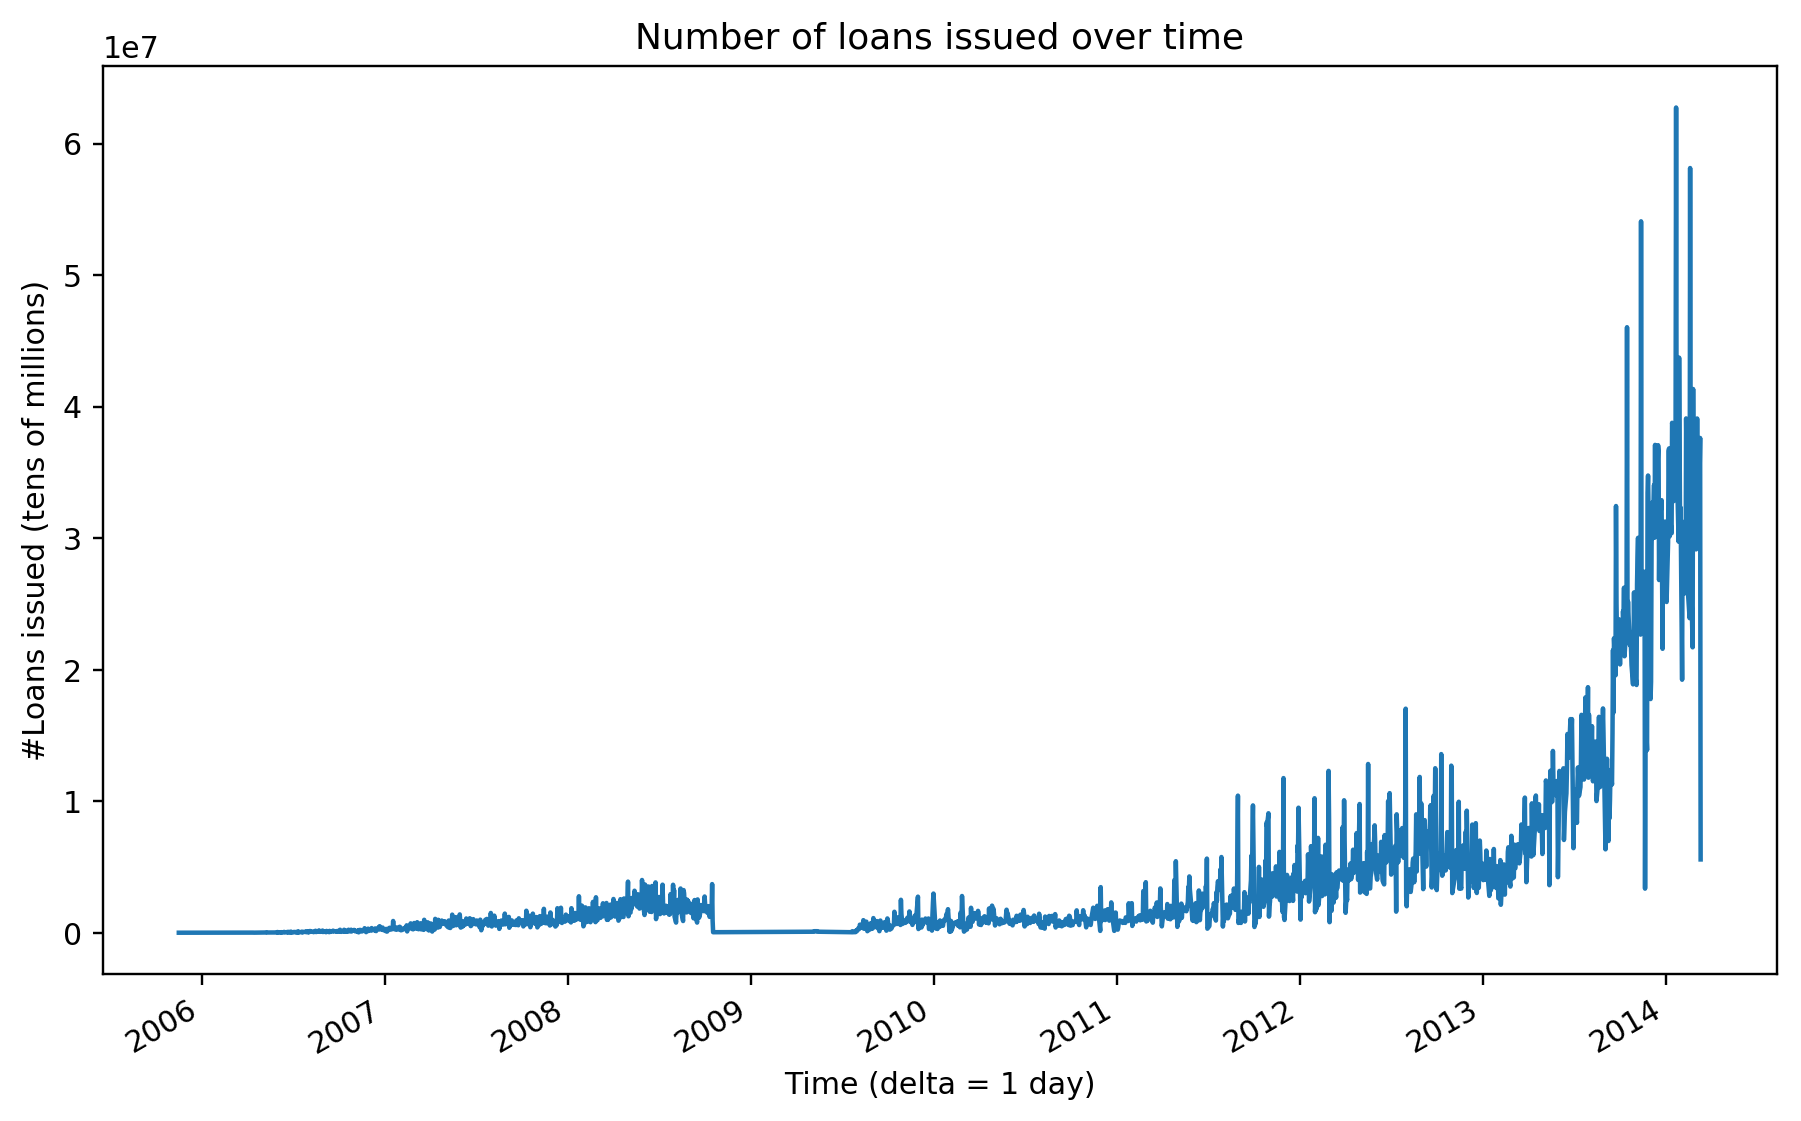

In [35]:
#time series plot for `sum_loan_plot` by the day
create_fig('Time (Days)', '#Loans issued (tens of millions)', 'Number of loans issued over time')
sum_loan_time.plot(kind='line',color=default_blue)
plt.xlabel('Time (delta = 1 day)');

#### Findings

* the number of loans disbursed changes with time
    * the number fluctuates
        * there are seemingly regular but wide fluctuations according to the time series
            * fluctuations in the periods Q4 2013 to Q2 2014 inclusive are remarkably wide
        * there are little to no fluctuations starting Q4 2008 to Q3 2009, inclusive (this is exactly 12 months)
        * the highest number of loans issued, in a year, before 2011 were issued in 2008 according to the bar chart

* there appears to be an exponential trend
    * trend shows that number of loans issued appears to increase exponentially despite the fluctuations

* findings from summary statistics 
    * the average number of loans issued, per annum, between 2005 and 2014 inclusive is _c._ 4.3 million
    * the range is 1 to _c._ 63 million
    * the standard deviation is large (_c._ 7.5 million); it follows that the variance (the fluctuations discussed above) is quite large

What, really, happens:
  * before 2007
  * during Q4 2008 to Q3 2009, inclusive

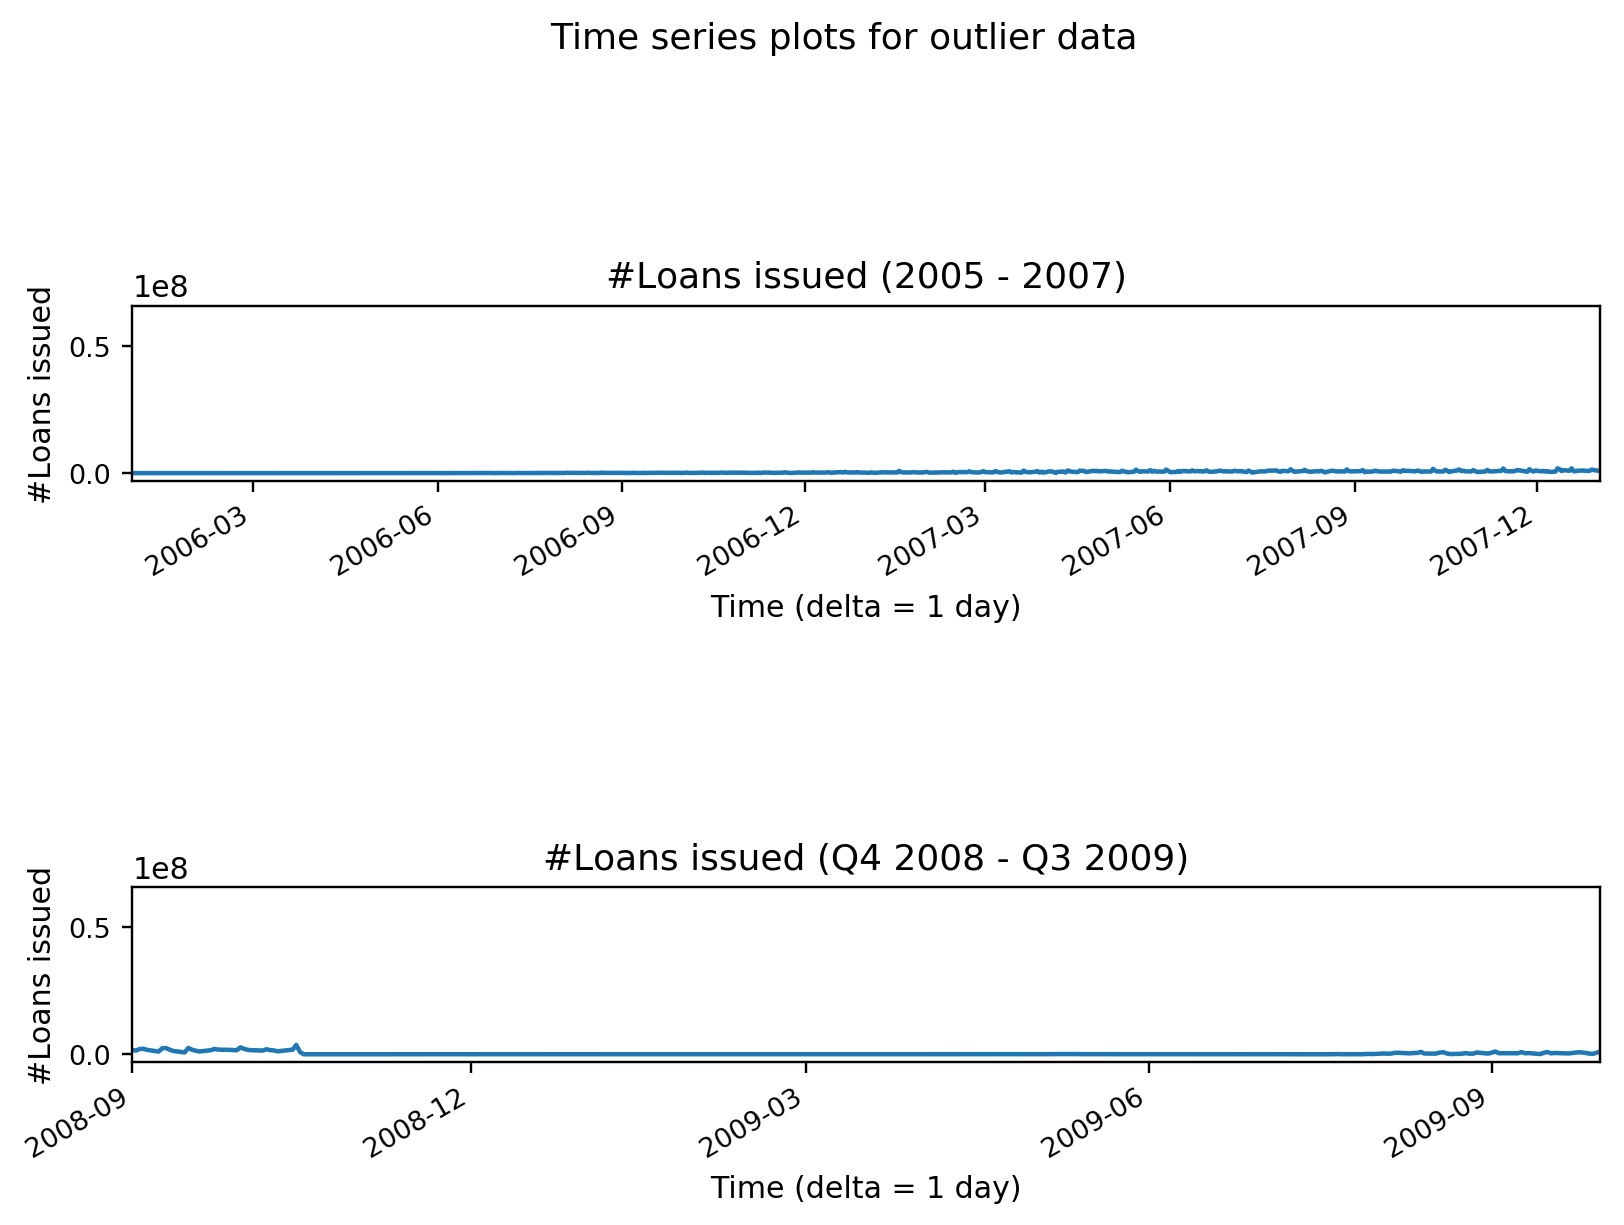

In [36]:
#visualise said timelines
create_sub(2,1)
plt.suptitle('Time series plots for outlier data')

#sub-plot #1: loans issued pre-2007
plt.subplot(2, 1, 1)
sum_loan_time.plot(kind='line',color=default_blue, xlim=['2005-12-31','2008-01-01'], title='#Loans issued (2005 - 2007)', fontsize=9)
plt.xlabel('Time (delta = 1 day)')
plt.ylabel('#Loans issued');

#sub-plot #2: loans issued during Q4 2008 to Q3 2009
plt.subplot(2,1,2)
sum_loan_time.plot(kind='line',color=default_blue, xlim=['2008-09-01','2009-09-30'], title='#Loans issued (Q4 2008 - Q3 2009)', fontsize=9)
plt.xlabel('Time (delta = 1 day)')
plt.xticks(['2008-09', '2008-12', '2009-03', '2009-06', '2009-09'])
plt.ylabel('#Loans issued');

##### What happens before 2007?
   * nothing, for the most part
   * activity begins at the beginning of Q2 2007
   * little activity; less than a million loans, in total, are issued

##### What happens during Q4 2008 to Q3 2009, inclusive?
   * nothing, for the most part
   * activity ceases during the middle of Q4 2008
   * said activity stays at zero until late Q2 2009
   * little activity; less than fifteen million loans, in total, are issued

### Question #4

#### To whom does Prosper lend?

* this is a broad question; emphasis on occupation, income level, home ownership status, state of residence and employment status
    * plot a chart of:
        * top ten occupations
        * bottom ten occupations
        * income groups
        * home ownership
        * top ten states of residence
        * bottom ten states of residence
        * employment status

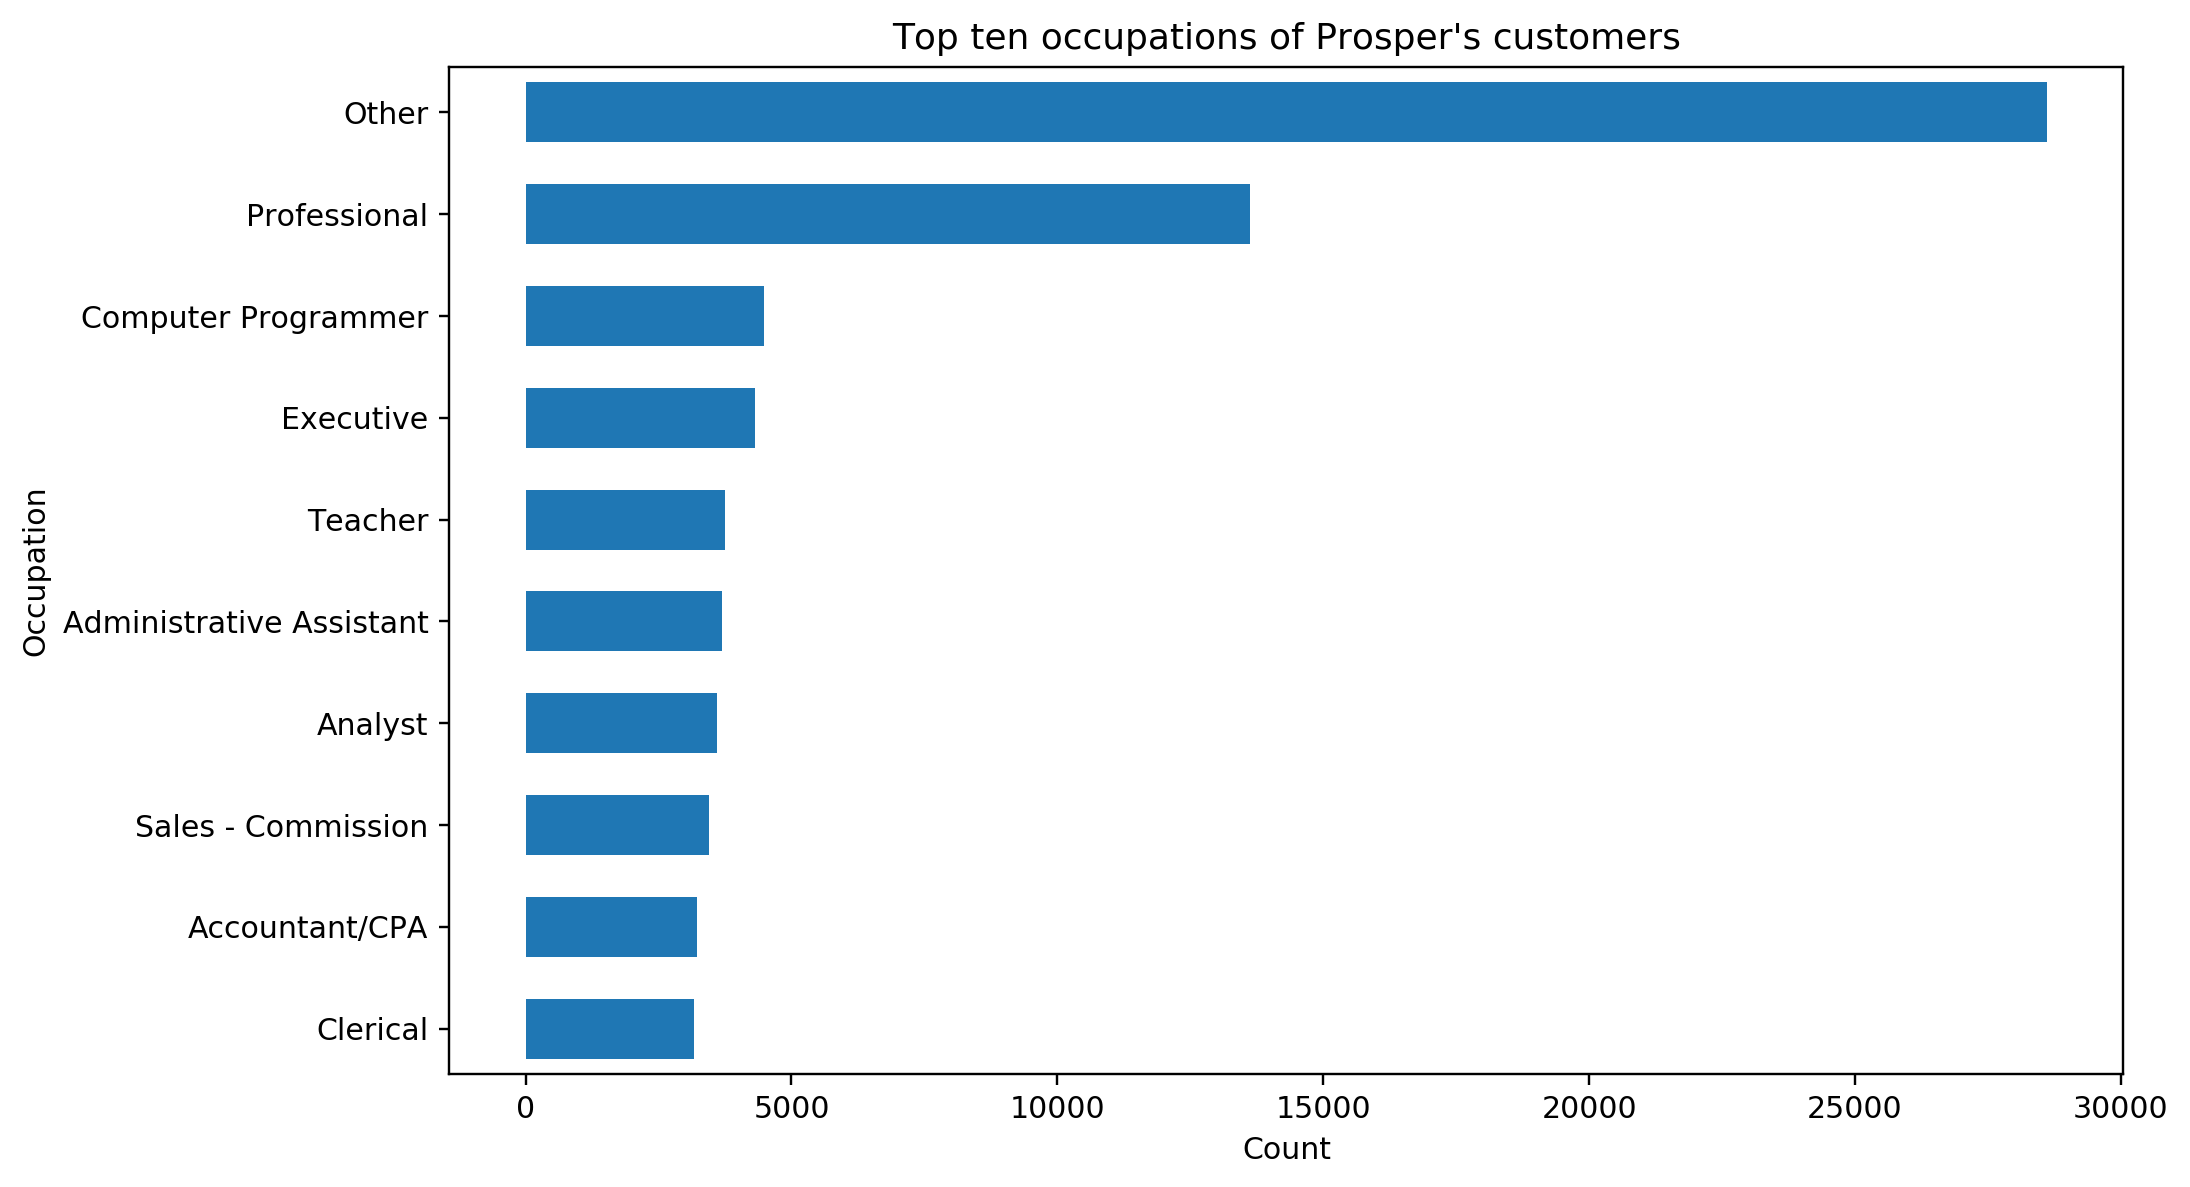

In [18]:
#Occupation: top ten
y = df.Occupation.value_counts().values[:10]
x = df.Occupation.value_counts().index[:10]

#sort top 10
dd = custom_sort_df(x, y)

#create viz
create_fig('Count', 'Occupation', 'Top ten occupations of Prosper\'s customers' )
plt.hlines(y=dd.index, xmin=0, xmax=dd.Count, color=default_blue, linewidth=20)
plt.yticks(np.arange(len(x)), dd.iloc[:,0]);

Categories `Other` and `Professional`

* `Other` is ambiguous; not quite certain what it represents 
* `Professional`, according to the [US bureau of labour statistics](https://www.bls.gov/ncs/ocs/ocsm/commain.htm), appears to be a collective term

What happens when `Other` and `Professional` are excluded?

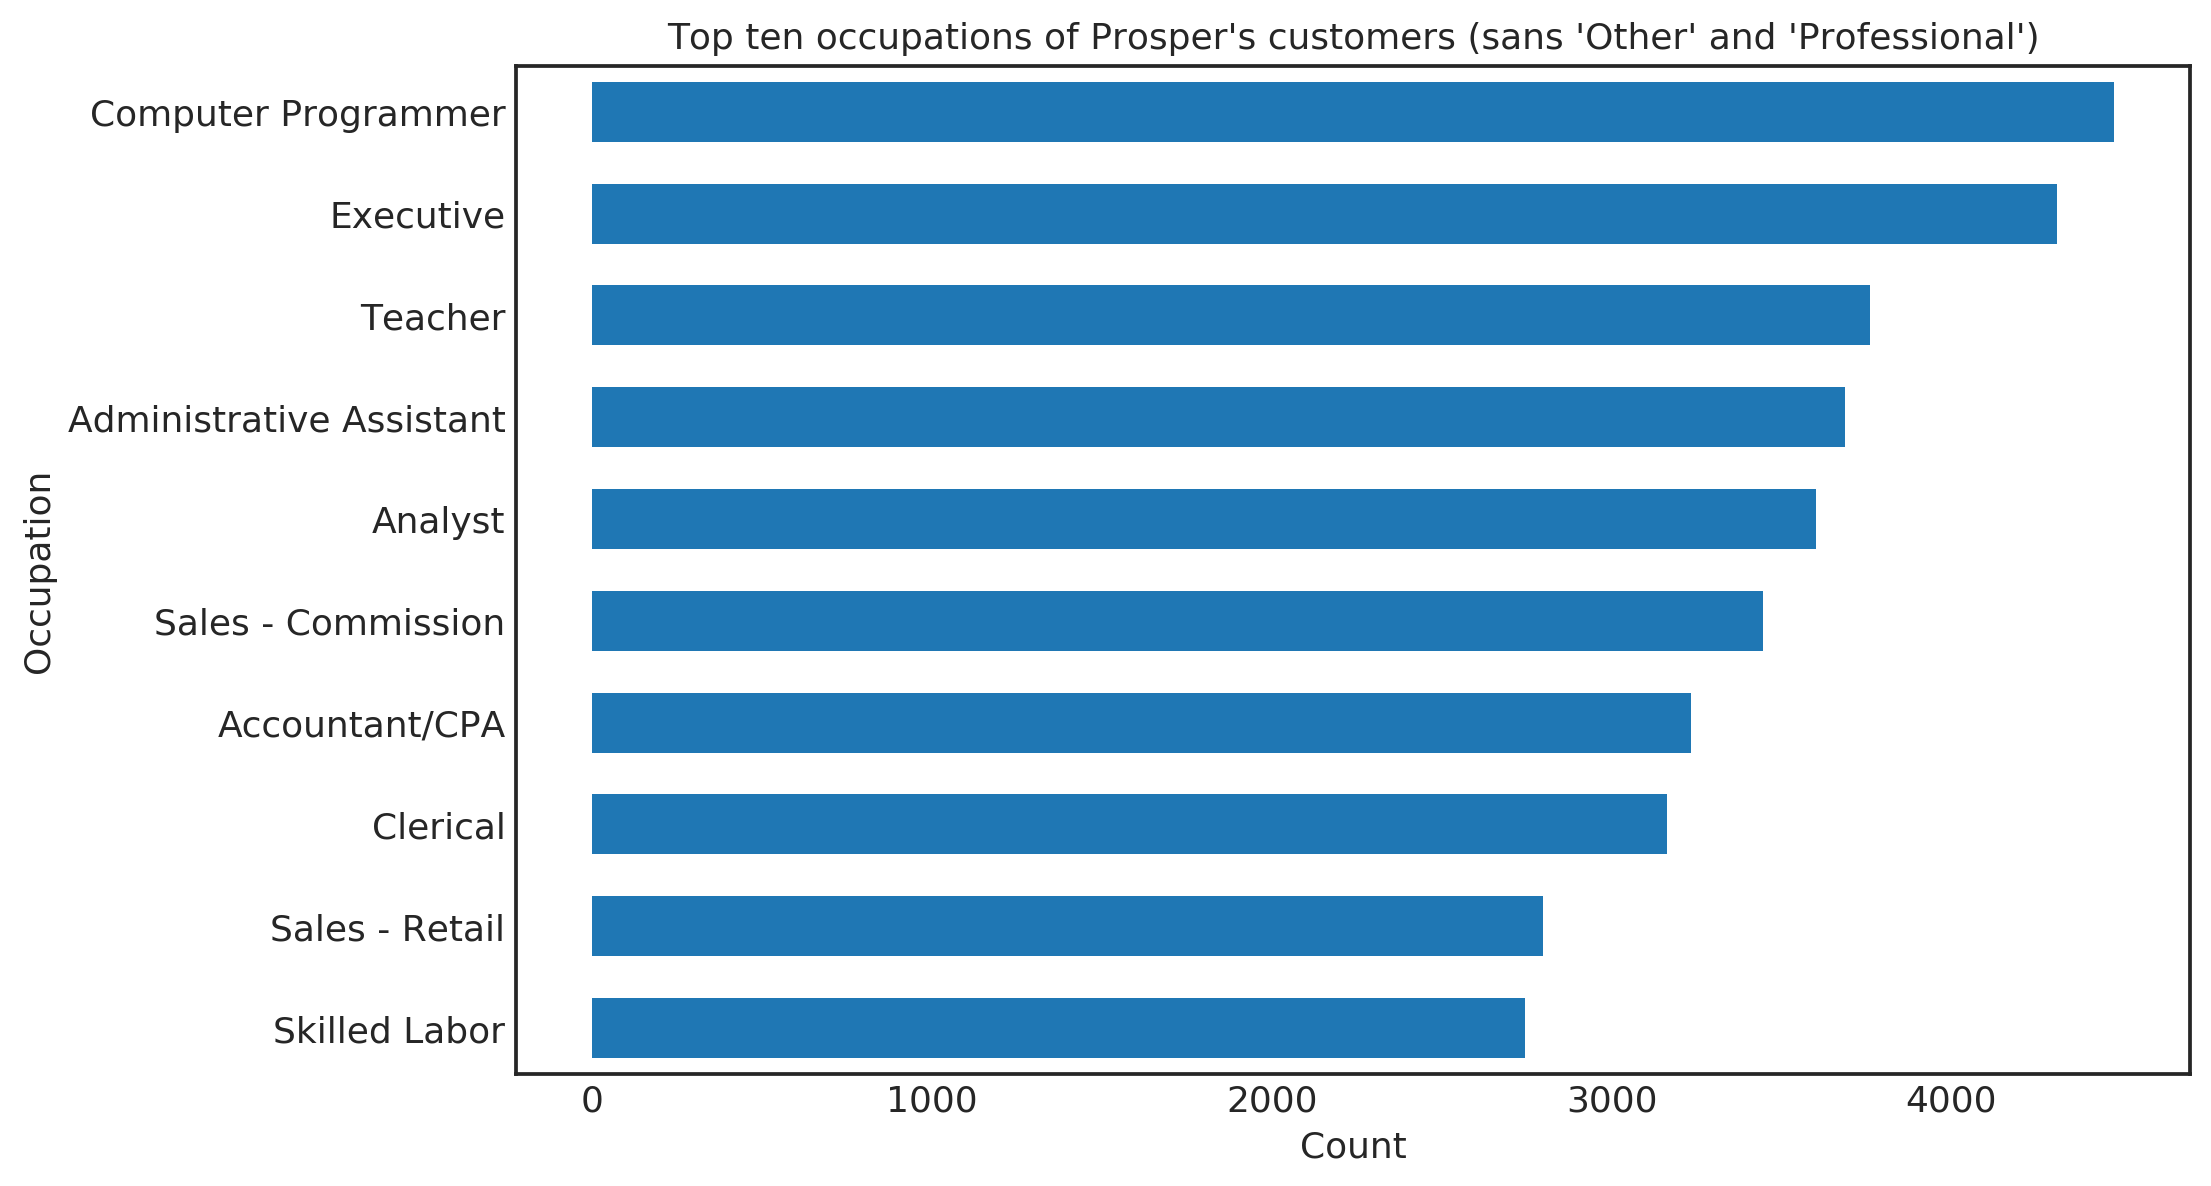

In [91]:
#Occupation:  top ten sans `Others` and `Professional`
y = df.Occupation.value_counts().values[2:12]
x = df.Occupation.value_counts().index[2:12]

#sort top 10
dd = custom_sort_df(x, y)

#create viz
create_fig('Count', 'Occupation', 'Top ten occupations of Prosper\'s customers (sans \'Other\' and \'Professional\')' )
plt.hlines(y=dd.index, xmin=0, xmax=dd.Count, color=default_blue, linewidth=20)
plt.yticks(np.arange(len(x)), dd.iloc[:,0]);

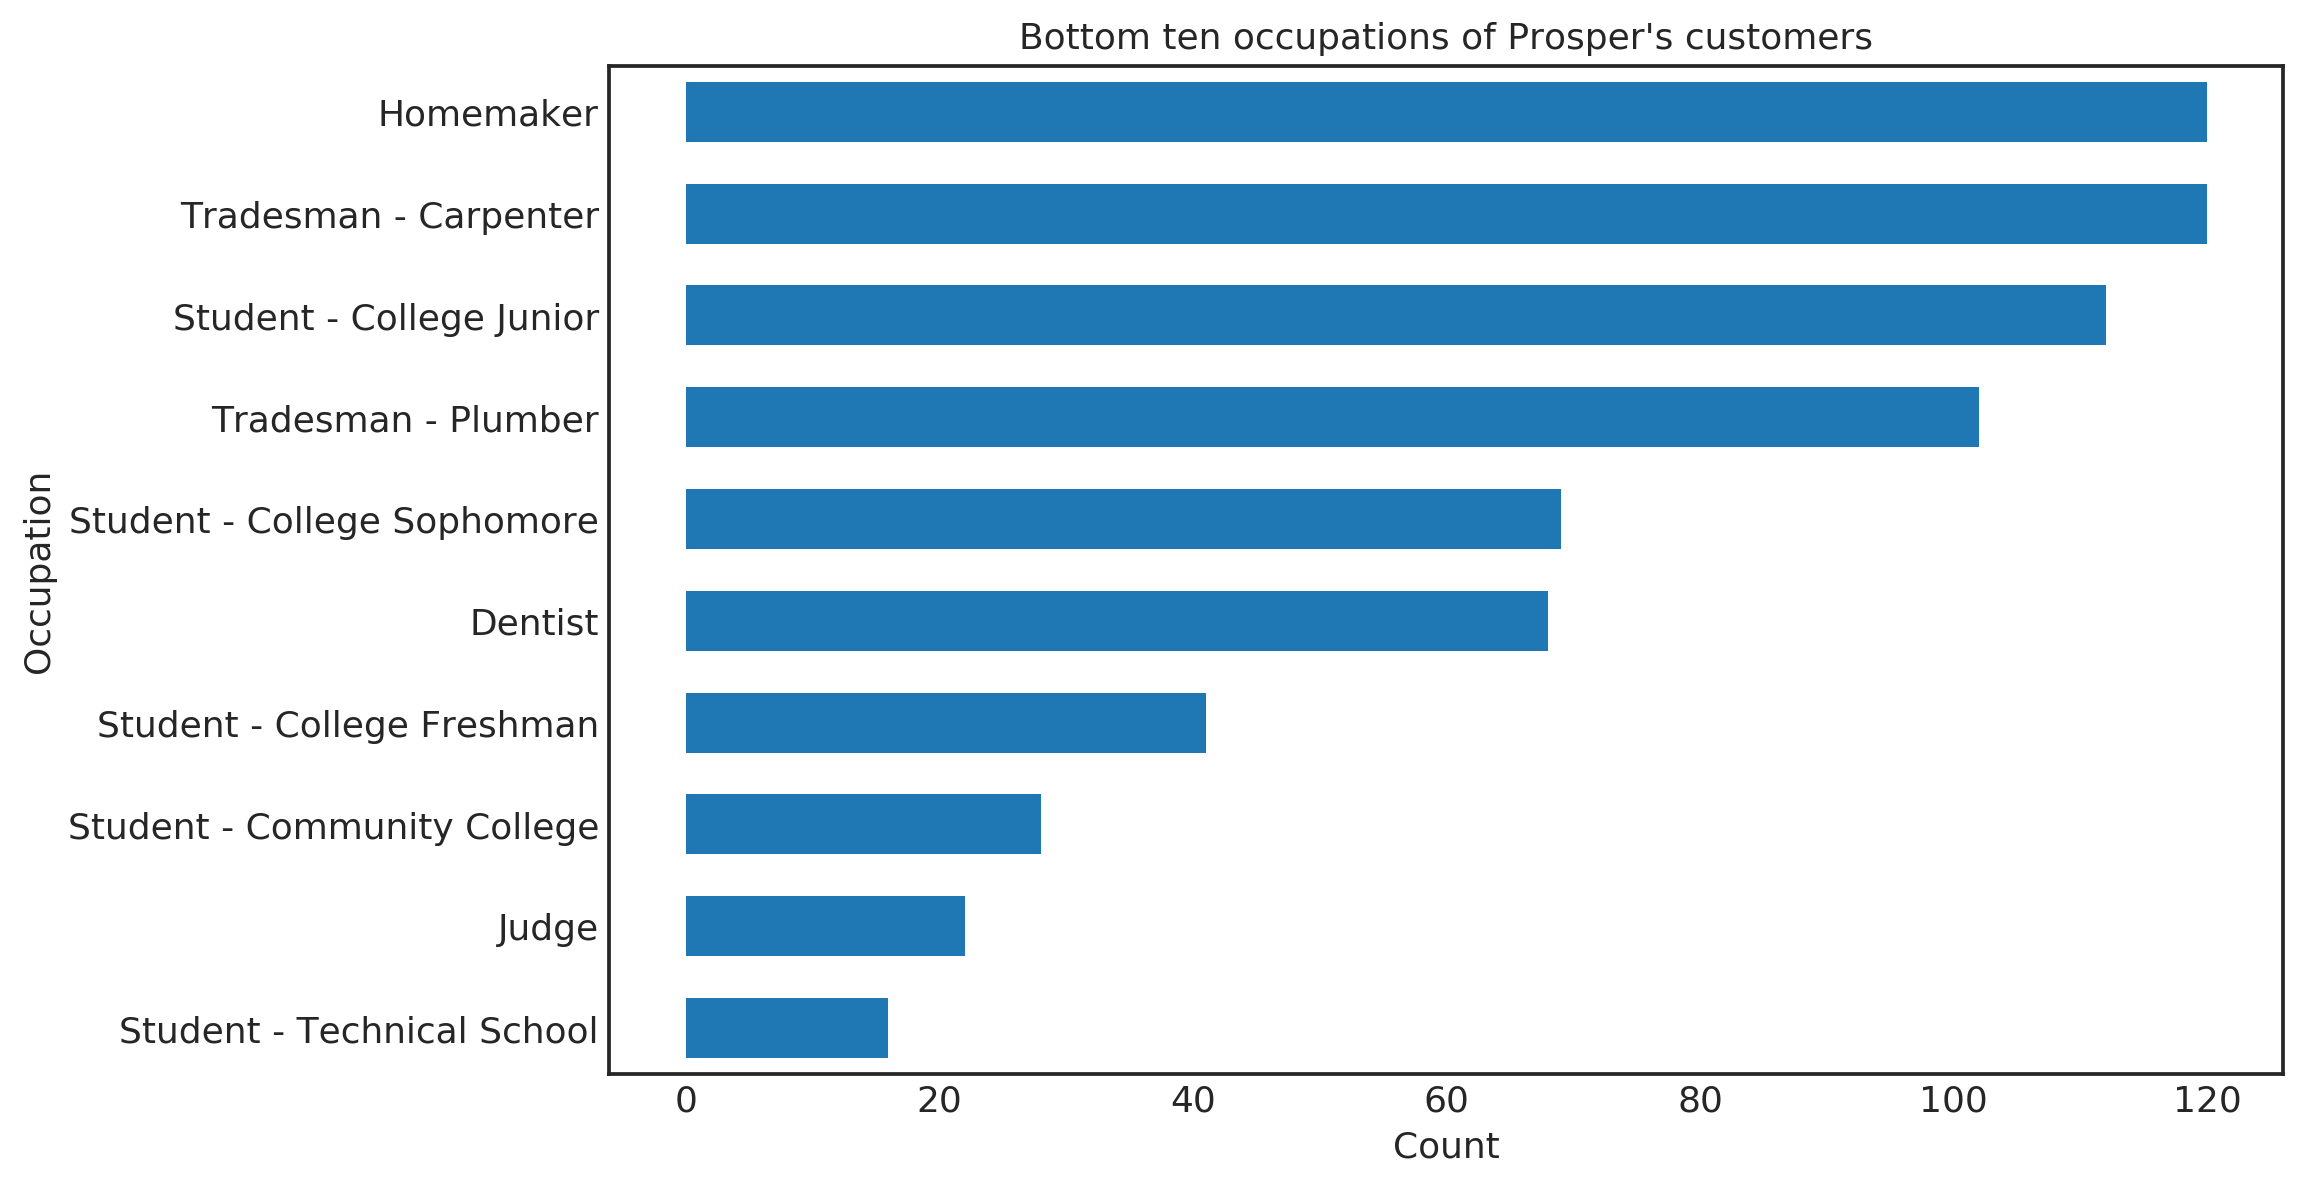

In [90]:
#Occupation: bottom 10
y = df.Occupation.value_counts().values[-10:]
x = df.Occupation.value_counts().index[-10:]

#sort bottom 10
dd = custom_sort_df(x, y)

#create viz
create_fig('Count', 'Occupation', 'Bottom ten occupations of Prosper\'s customers' )
plt.hlines(y=dd.index, xmin=0, xmax=dd.Count, color=default_blue, linewidth=20)
plt.yticks(np.arange(len(x)), dd.iloc[:,0]);

In [40]:
#show top ten sans 2 unclear categories
y = df.Occupation.value_counts().values[2:12]
x = df.Occupation.value_counts().index[2:12]
top_ten = pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()
top_ten

,Count
Computer Programmer,4478
Executive,4311
Teacher,3759
Administrative Assistant,3688
Analyst,3602
Sales - Commission,3446
Accountant/CPA,3233
Clerical,3164
Sales - Retail,2797
Skilled Labor,2746


In [41]:
#show bottom ten
y = df.Occupation.value_counts().values[-10:]
x = df.Occupation.value_counts().index[-10:]
bottom_ten = pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()
bottom_ten

,Count
Tradesman - Carpenter,120
Homemaker,120
Student - College Junior,112
Tradesman - Plumber,102
Student - College Sophomore,69
Dentist,68
Student - College Freshman,41
Student - Community College,28
Judge,22
Student - Technical School,16


#### Findings

##### Occupation
* an overwhelming majority of the top ten occupations are [white collar](https://www.investopedia.com/terms/w/whitecollar.asp)
* a majority of the bottom ten occupations, that are not students, are [blue collar](https://www.investopedia.com/terms/b/bluecollar.asp)
* half of the occupations in the bottom ten are students



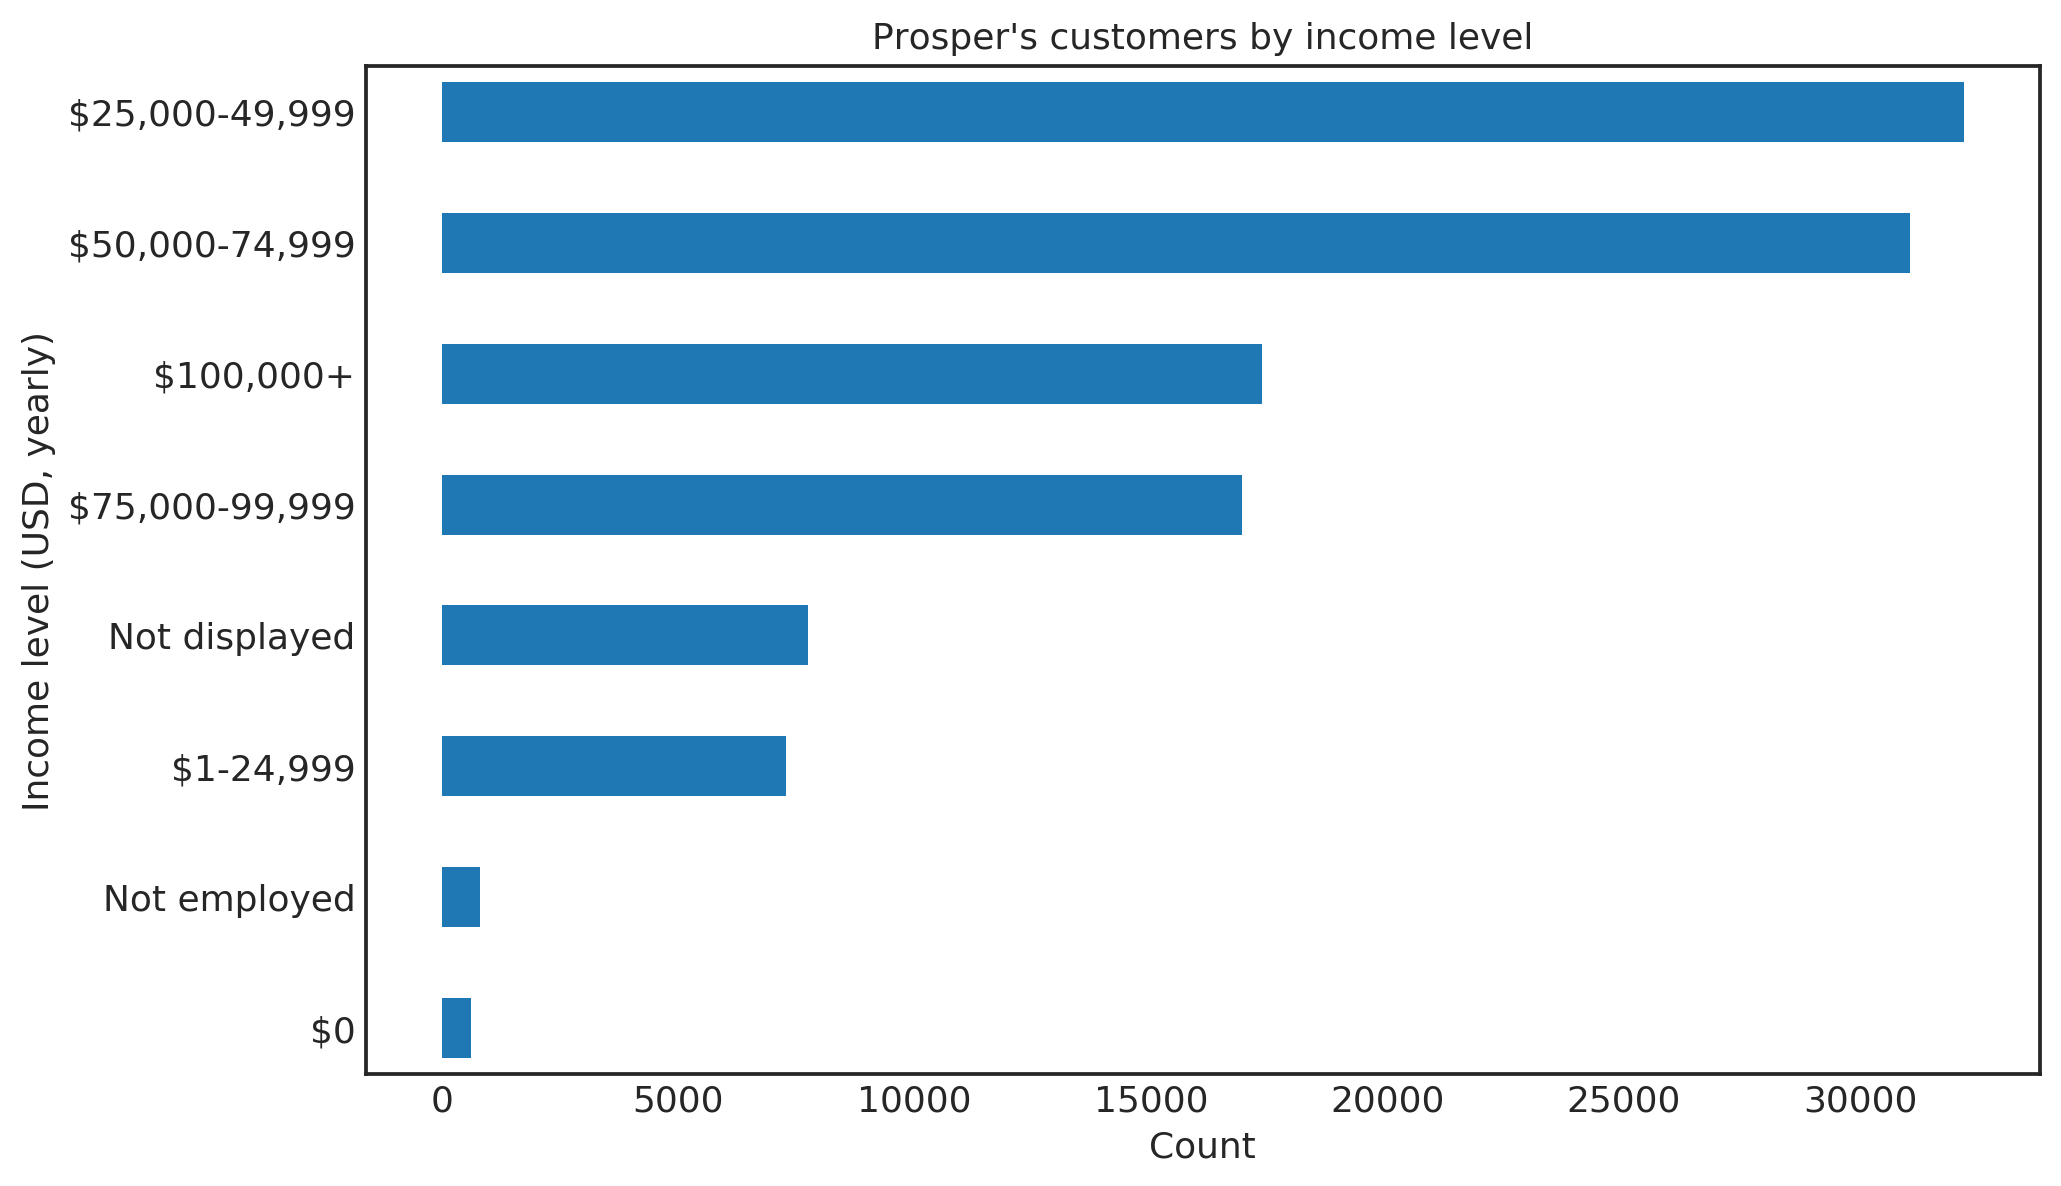

In [88]:
#Income Levels

y = df.IncomeRange.value_counts().values[:]
x = df.IncomeRange.value_counts().index[:]

#sort income levels
dd = custom_sort_df(x, y)

#create viz
create_fig('Count', 'Income level (USD, yearly)', 'Prosper\'s customers by income level')
plt.hlines(y=dd.index, xmin=0, xmax=dd.Count, color=default_blue, linewidth=20)
plt.yticks(np.arange(len(x)), dd.iloc[:, 0]);

In [43]:
#show income levels
pd.DataFrame({k:v for (k, v) in zip(x,y)}, index=['Count']).transpose()

,Count
"$25,000-49,999",32192
"$50,000-74,999",31050
"$100,000+",17337
"$75,000-99,999",16916
Not displayed,7741
"$1-24,999",7274
Not employed,806
$0,621


#### Findings

#####  Income level
* an overwhelming majority of loans are issued to those whose income level is above USD 25,000.00 _p.a._
    * the top 2 groups account for 55.8% of loans issued 
    * the top 4 groups account for 85.4% of loans issued
* top 4 income groups by loans issued: 
    * `$25,000-49,999`
    * `$50,000-74,999`
    * `$100,000+`
    * `$75,000-99,999`
* the category `Not displayed` is ambiguous, as such, cannot be interpreted
* prosper lends to unemployed applicants
    * unemployed refers to the category `Not employed`. Not sure if an employee can earn USD 0.00 p.a; [this article](https://compensation.blr.com/Compensation-news/Compensation/Deductions-from-Paychecks/zns-Rules-for-deductions-from-pay-Which-can-drop-w/) and [this one](https://www.opm.gov/policy-data-oversight/pay-leave/leave-administration/fact-sheets/leave-without-pay/) have diverging views

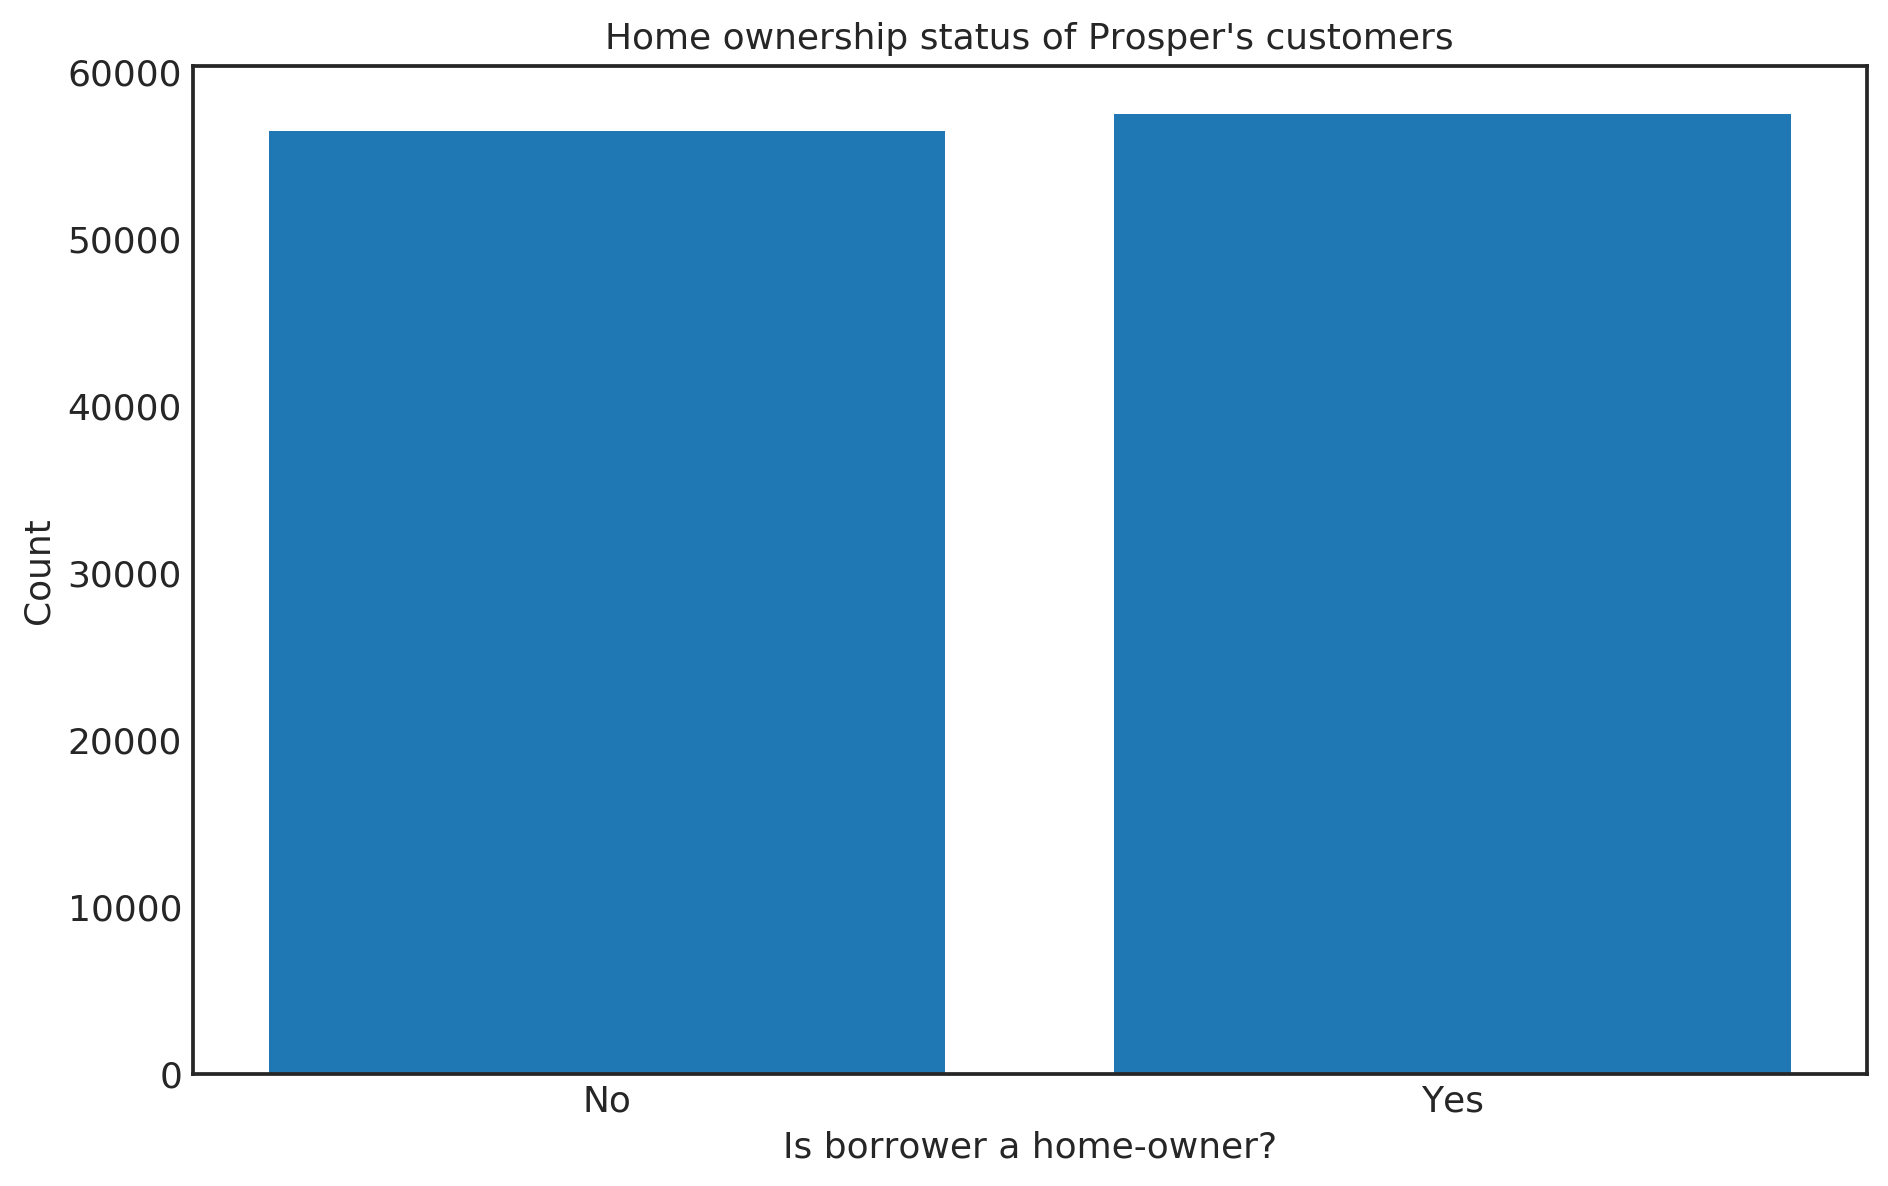

In [75]:
#Home ownership status

#home ownership: values to plot
y = df.IsBorrowerHomeowner.value_counts().values[:]
x = df.IsBorrowerHomeowner.value_counts().index[:]

#create viz
create_fig('Is borrower a home-owner?', 'Count', 'Home ownership status of Prosper\'s customers')
plt.bar(x, y, color=default_blue)
plt.xticks(np.arange(2), ['No', 'Yes']);

In [45]:
#show home ownership status
pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()

,Count
True,57478
False,56459


#### Findings

#####  Home ownership status
* there is an almost-even split between those that own a home and those that do not
    * 50.4% of borrowers own a home


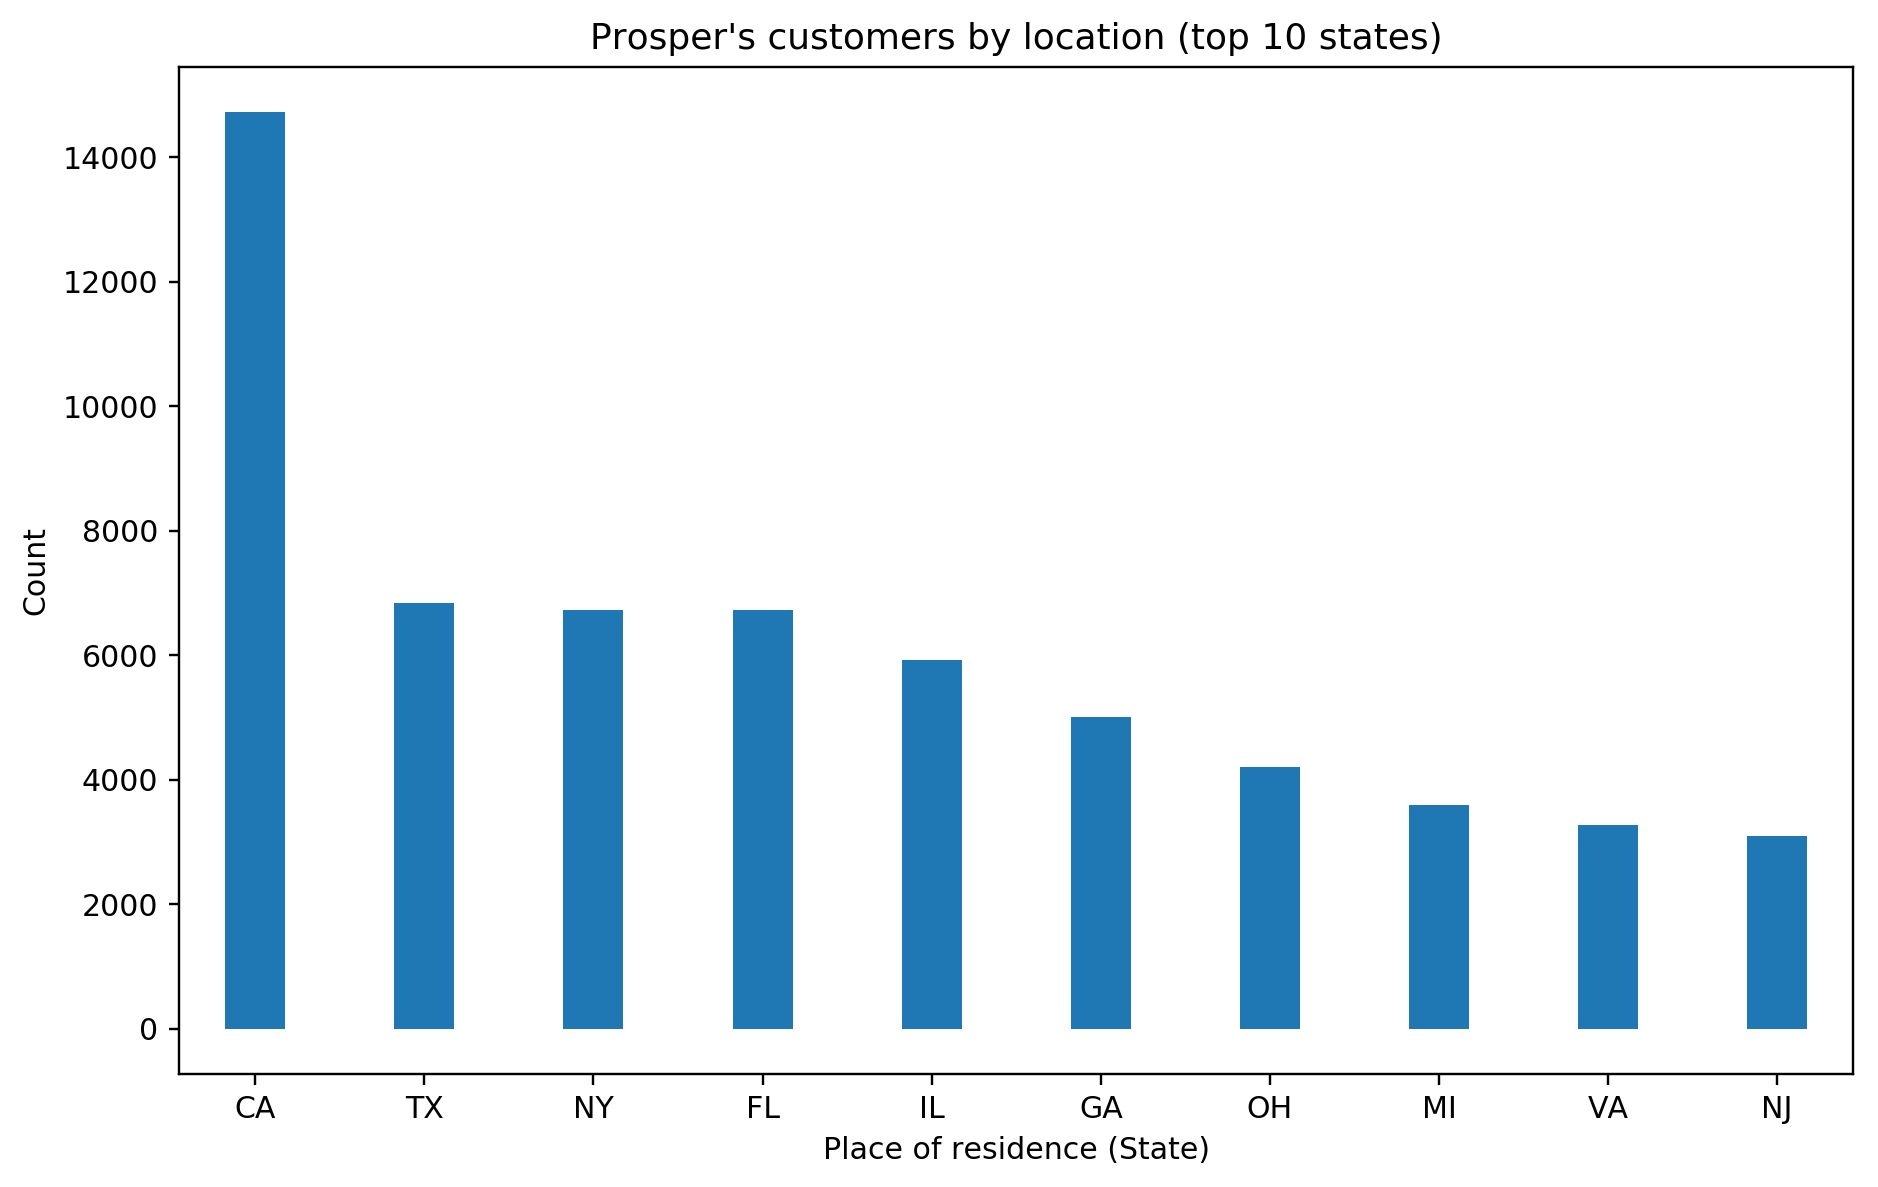

In [21]:
#Location by state

#state top-ten: values to plot
y = df.BorrowerState.value_counts().values[:10]
x = df.BorrowerState.value_counts().index[:10]

#sort states
dd = custom_sort_df(x, y, ascending=False)

#create viz
create_fig('Place of residence (State)', 'Count', 'Prosper\'s customers by location (top 10 states)')
plt.vlines(x=dd.index, ymin=0, ymax=dd.Count, color=default_blue, linewidth=20)
plt.xticks(np.arange(len(x)), dd.iloc[:, 0]);

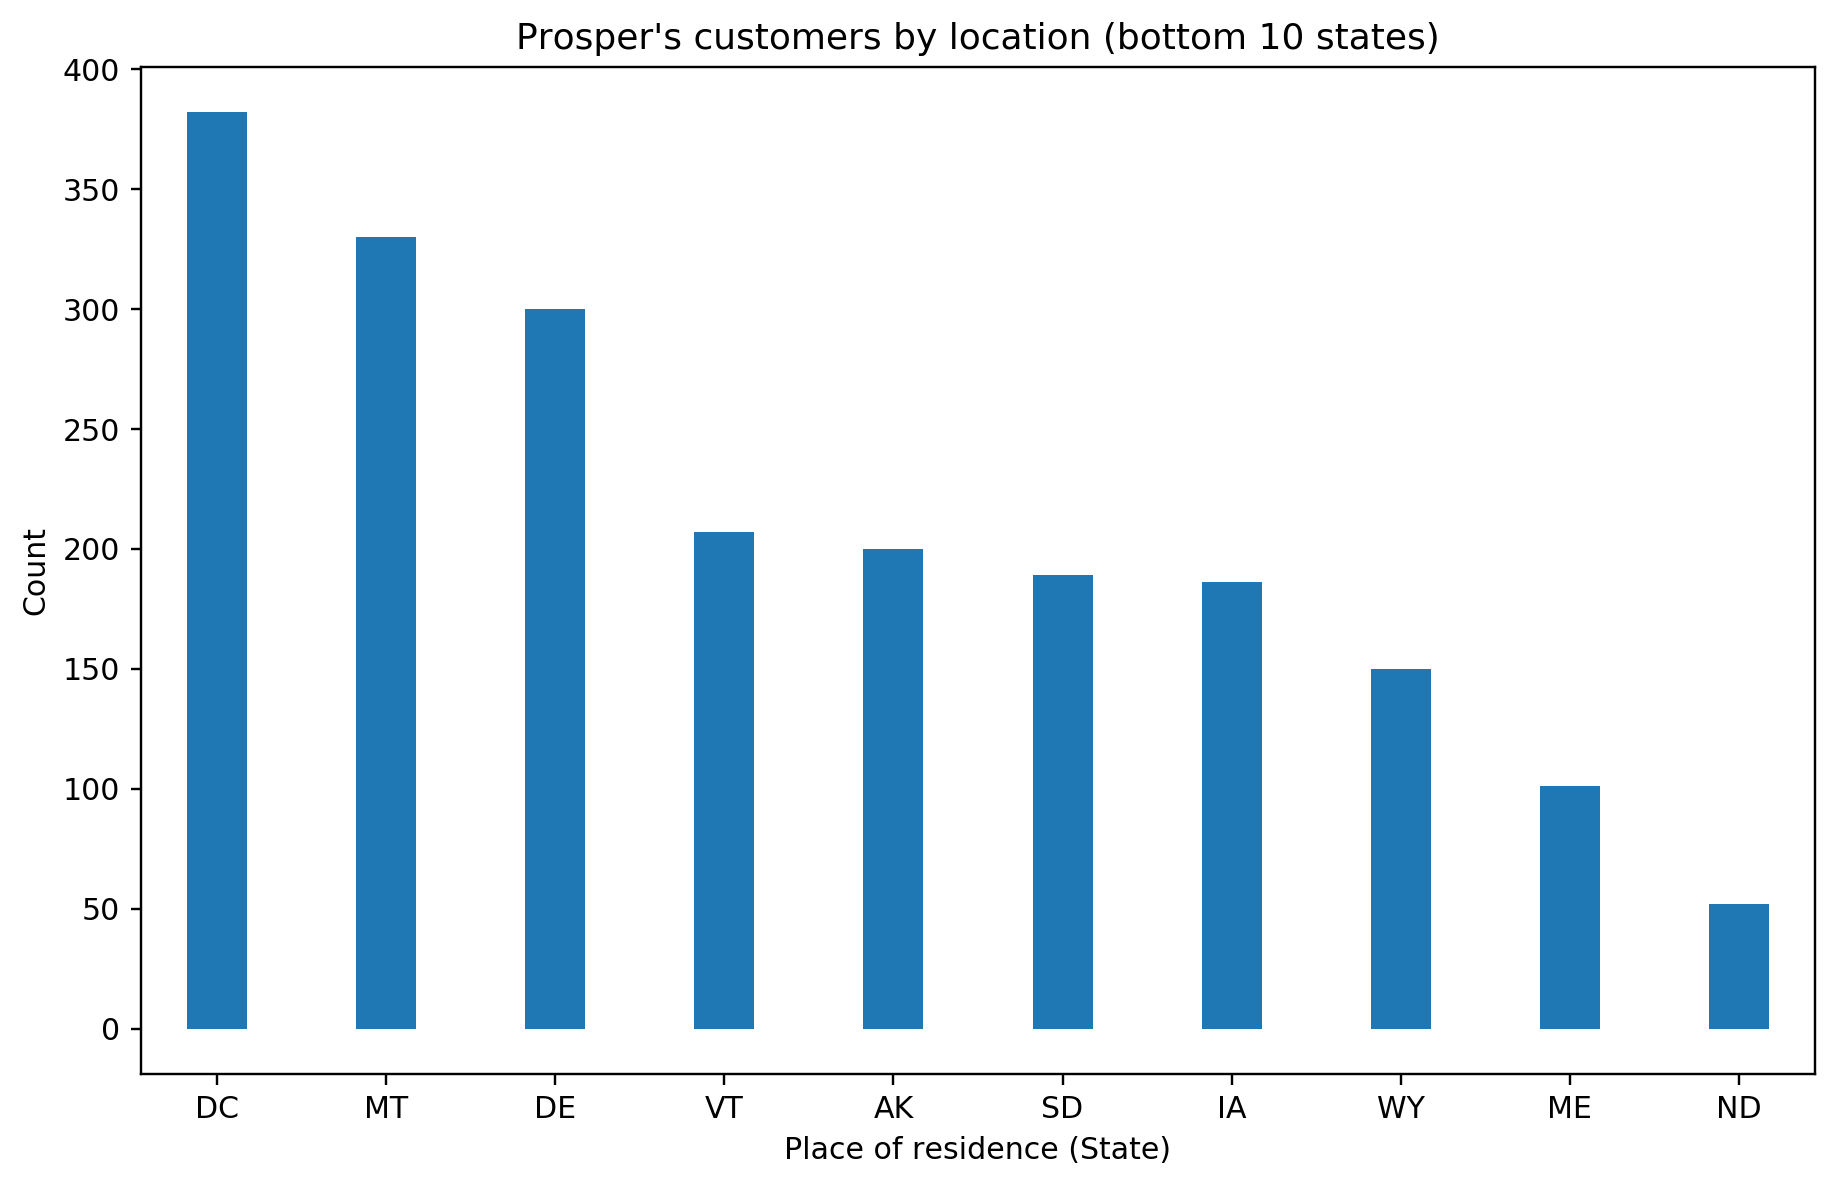

In [22]:
#state bottom ten: values to plot
y = df.BorrowerState.value_counts().values[-10:]
x = df.BorrowerState.value_counts().index[-10:]

#sort states
dd = custom_sort_df(x, y, ascending=False)

#create viz
create_fig('Place of residence (State)', 'Count', 'Prosper\'s customers by location (bottom 10 states)')
plt.vlines(x=dd.index, ymin=0, ymax=dd.Count, color=default_blue, linewidth=20)
plt.xticks(np.arange(len(x)), dd.iloc[:, 0]);

In [48]:
#show top ten
y = df.BorrowerState.value_counts().values[:10]
x = df.BorrowerState.value_counts().index[:10]
pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()

,Count
CA,14717
TX,6842
NY,6729
FL,6720
IL,5921
GA,5008
OH,4197
MI,3593
VA,3278
NJ,3097


In [49]:
#show bottom ten
y = df.BorrowerState.value_counts().values[-10:]
x = df.BorrowerState.value_counts().index[-10:]
pd.DataFrame({k:v for (k, v) in zip(x, y)}, index=['Count']).transpose()

,Count
DC,382
MT,330
DE,300
VT,207
AK,200
SD,189
IA,186
WY,150
ME,101
ND,52


#### Findings

##### State
* the state of California has the most borrowers
* the state of North Dakota has the least borrowers
* a majority of the states with the least borrowers are from the so-called "[fly-over country](https://en.wikipedia.org/wiki/Flyover_country)"
* all of the states in the top ten list have a [large population](https://data.census.gov/cedsci/table?tid=PEPPOP2021.NST_EST2021_POP&hidePreview=false)



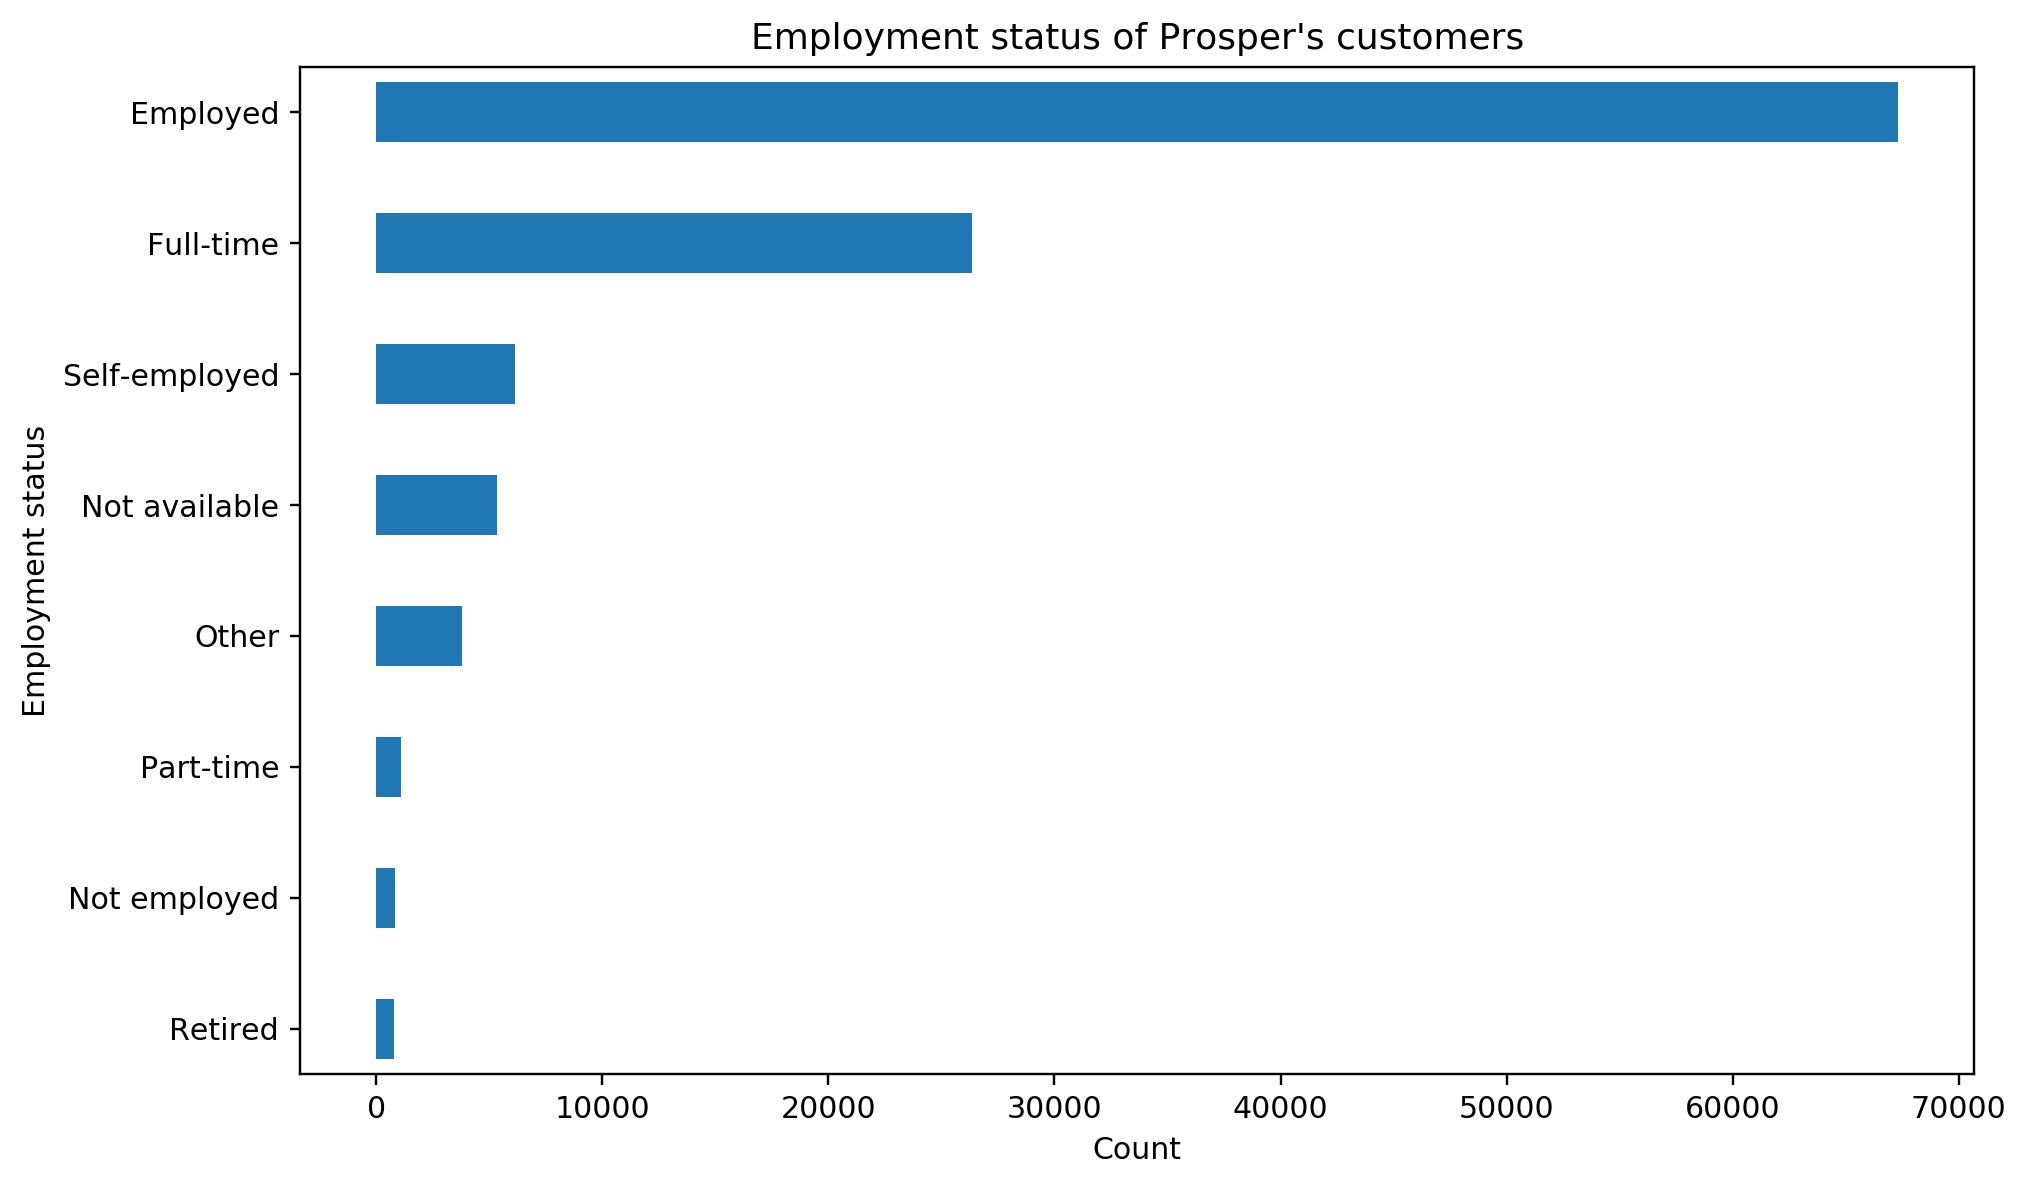

In [27]:
#Employment status

#employment status: values to plot
y = df.EmploymentStatus.value_counts().values[:]
x = df.EmploymentStatus.value_counts().index[:]

#sort income levels
dd = custom_sort_df(x, y)

#create viz
create_fig('Count', 'Employment status', 'Employment status of Prosper\'s customers')
plt.hlines(y=dd.index, xmin=0, xmax=dd.Count, color=default_blue, linewidth=20)
plt.yticks(np.arange(len(x)), dd.iloc[:, 0]);

`Employed` is ambiguous; does it mean:
   * `Full-time`, `Part-time` or `Self-employed`
   * any combination of the three

Is it to be treated as its own category?
   * Cannot tell from the description of variables or upon examination of variable `EmploymentStatus`

#### Findings

##### Employment status
* an overwhelming majority of borrowers are employed




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

<div id="bivar"></div>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Will follow the [method](#method) used in [univariate exploration](#univar)

### Question #5

##### What affects the `BorrowerRate`?
   * emphasis on term, income level, home ownership status, state of residence and employment status
   * scatter plots of `BorrowerRate` against:
        * term of loans
        * income groups
        * home ownership
        * top ten states of residence
        * bottom ten states of residence
        * employment status

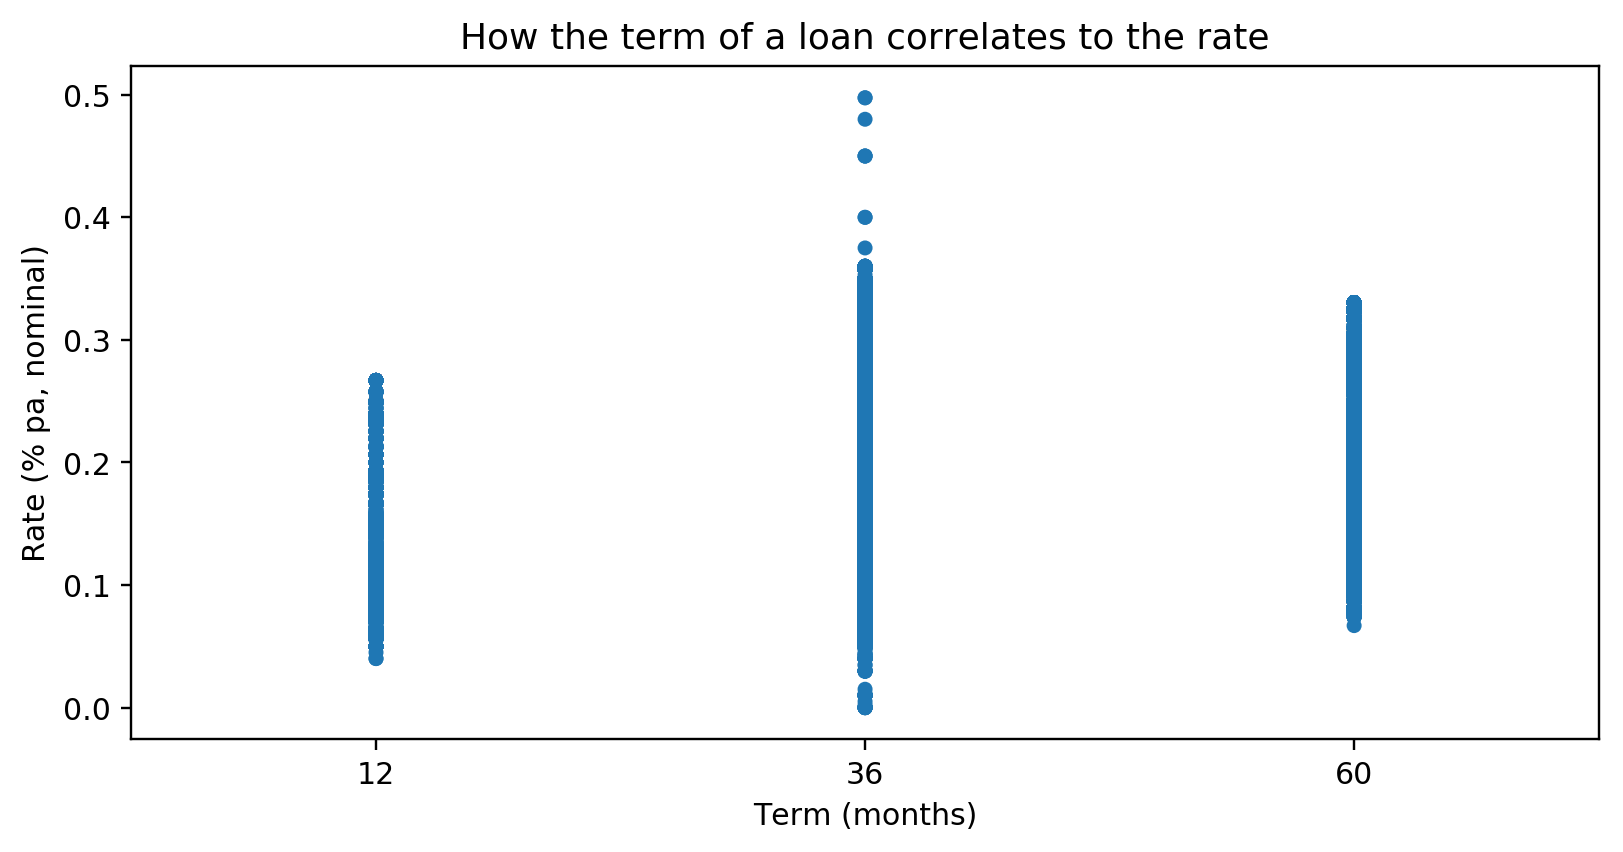

In [24]:
#term

#see correlation between `Term` and `BorrowerRate`
fig, ax = create_sub()
sns.stripplot(df.Term, df.BorrowerRate, color=default_blue)
plt.title('How the term of a loan correlates to the rate')
plt.xlabel('Term (months)')
plt.ylabel('Rate (% pa, nominal)');

#### Findings

##### Term 

* values are clustered around 12, 36 and 60 months
* the term `36 months` has the highest spread (range, if you like)
* the term `12 months` has the lowest spread


The data points are clustered; what happens when they are jittered?
   * will use colour for ease of interpretation

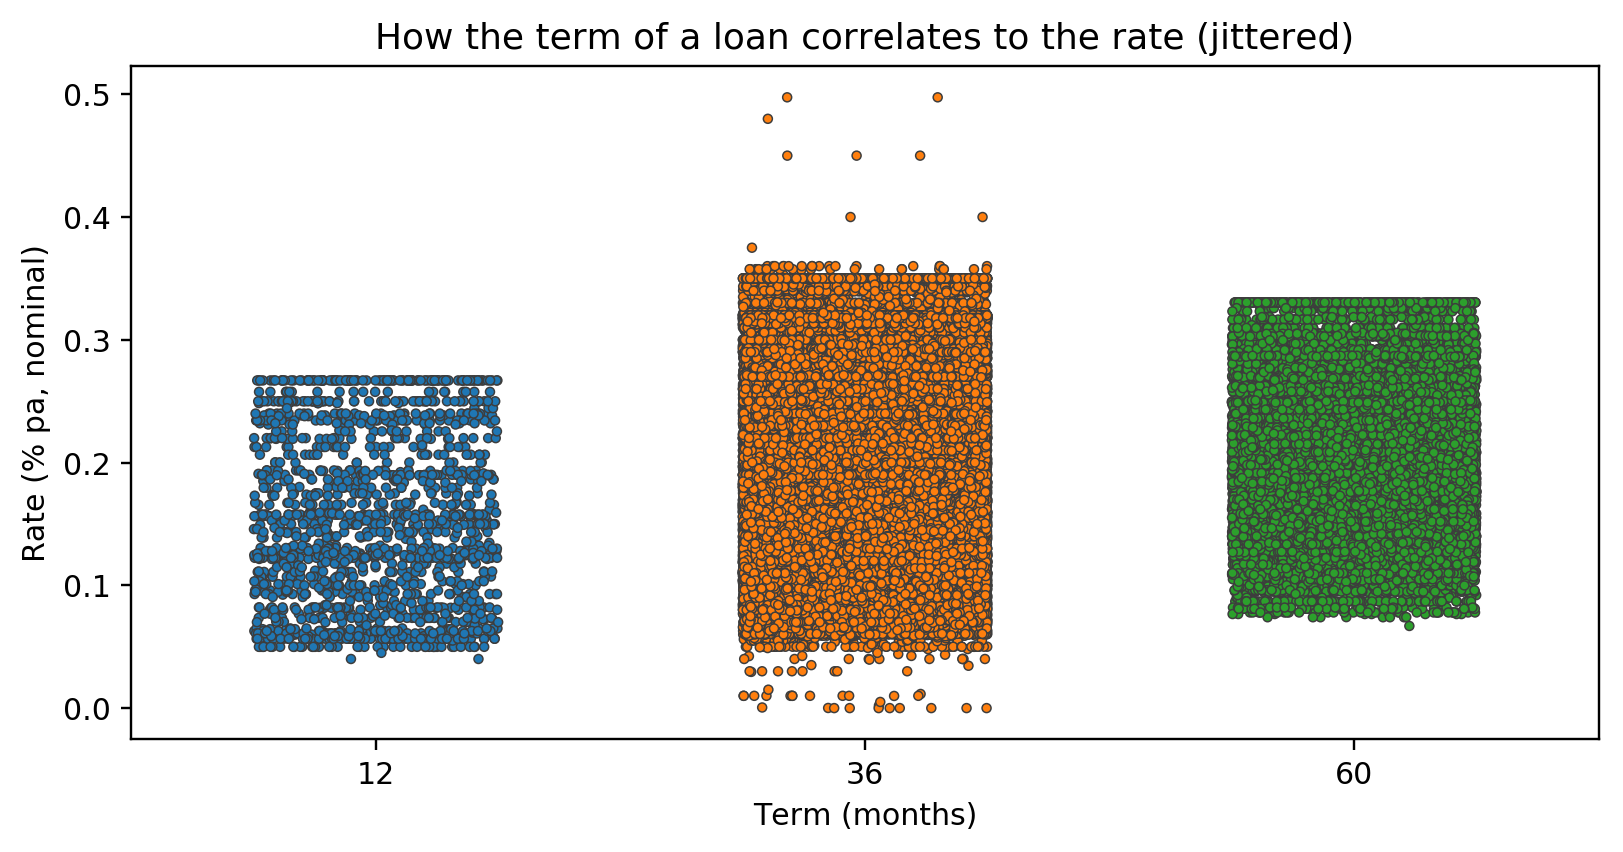

In [26]:
#jittered stripplot for `BorrowerRate` against `Term`

fig, ax = create_sub()
sns.stripplot(df.Term, df.BorrowerRate, jitter=0.25, size=3, ax=ax, linewidth=.5)
plt.title('How the term of a loan correlates to the rate (jittered)')
plt.xlabel('Term (months)')
plt.ylabel('Rate (% pa, nominal)');

what happens when data points are jittered?
* the edges of the clusters are clearer
    * an overwhelming majority of loans of all terms are in the range 0.05% to 0.35%

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<div id="multivar"></div>

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Will follow the [method](#method) used in [univariate exploration](#univar)

### Question #x

What is the correlation between income group, employment status, home ownership status and the rate offered to a borrower?

* use `seaborn` to show correlation between `IncomeRange`, `EmploymentStatus`, `IsBorrowerHomeOwer` and `BorrowerRate`

In [51]:
#df to use for viz
income = list(df['IncomeRange'])
employed = list(df['EmploymentStatus'])
homeowner = list(df['IsBorrowerHomeowner'])
rate= list(df['BorrowerRate'])

corr_df = pd.DataFrame(data=[income, employed, homeowner, rate], index=['Income', 'Employed', 'Homeowner', 'Rate']).transpose()
corr_df = corr_df[pd.notnull(corr_df['Employed'])]
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111682 entries, 0 to 113936
Data columns (total 4 columns):
Income       111682 non-null object
Employed     111682 non-null object
Homeowner    111682 non-null object
Rate         111682 non-null object
dtypes: object(4)
memory usage: 4.3+ MB


/opt/conda/lib/python3.6/site-packages/seaborn/palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


ValueError: zero-size array to reduction operation minimum which has no identity

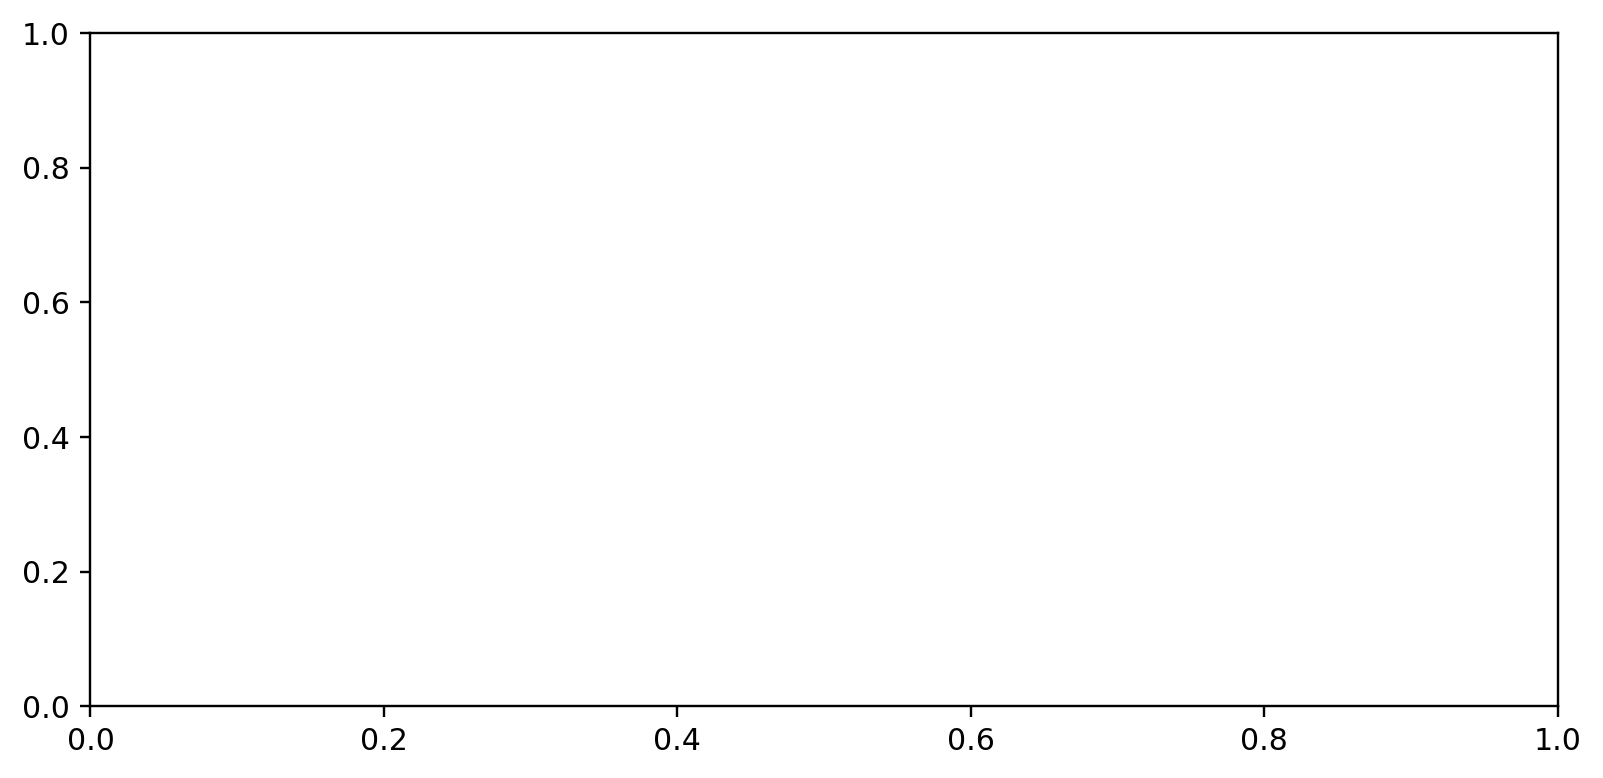

In [52]:
#sub-plots
fig, ax = create_sub()

#correlation matrix
corr = corr_df.corr()

#plot
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(255, 32, l=65, center="dark", as_cmap=True), square=True, ax=ax, annot=True, fmt="0.2f", linewidths=.5);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

<div id="summary"></div>

## Summary of Findings

<div id="outro"></div>

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

